<a href="https://colab.research.google.com/github/atulchune/EDA-Playstore-review-app-analysis/blob/main/Capstone_EDA_Play_store_review_app_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Play store review app analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member** -Atul J chune



# **Project Summary -**

For any business to succeed these days, going digital has become paramount and getting an application for your business can lead it towards more profits. None of us can now imagine our lives without using apps in our mobile phones. Think of any problem you are facing in your life, you will find a solution of same in form of an app specially curated to fix the issue for you. As per latest Google Play stats, there are 3.48 million apps currently at the Google Play Store. The number is constantly rising as around 3,739 apps are added to the Play Store every single day.

Due to constant rising numbers of apps, it becomes imperative to understand the parameters and patterns related to app creation from a business point of view. The Play store datasets are quite intriguing as they consist of details like number of installations, app reviews, sentiment ploarity and so on. In this project we digged deeper into the datasets by doing an Exploratory Data Analysis to see certain patterns that can be helpful to different category of businesses.

We began by in-depth cleaning of the datasets and then we merged them to create one dataset. After that we did a generalised analysis to get numerous insights. We particularly focussed on the customer behaviour and what components affect the decision of the user to install the app. With the information gathered, we further tried to see if for medical category creating an app would be benefical. If so, what kinds of apps have a higher probability of being liked by the audience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To perform exploratory data analysis (EDA) on the Google Playstore in order to understand the trends and patterns in app downloads, user ratings, and revenue generated by apps. Our main aim is to structure the data and then see numerous patterns and trends across different features. We will do a general study of dataset through visualisations and draw some preliminary conclusions. After that we will delve deeper into seeing the scope of medical apps and also the consumer behaviour in cased of apps related to the healthcare/medical category. Also we will make final conclusions about the probability of the success of a new app based on the gathered insights

Additionally, the EDA will also investigate any potential biases or limitations in the data, and make recommendations for further research to improve the understanding of the app market on the Playstore.

# ***Let's Begin !***

# **1. Know Your Data**

### Import Libraries

In [278]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [279]:
# import Dataset
from google.colab import drive
drive.mount('/content/Mydrive/')


Drive already mounted at /content/Mydrive/; to attempt to forcibly remount, call drive.mount("/content/Mydrive/", force_remount=True).


In [280]:
#load data
path1='/content/Mydrive/MyDrive/Capstone project/Play Store Data.csv'
path2='/content/Mydrive/MyDrive/Capstone project/User Reviews.csv'
playstore_data_df=pd.read_csv(path1)
user_rewiews_df=pd.read_csv(path2)

### Dataset First View

In [281]:
# Dataset First Look
playstore_data_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [282]:
user_rewiews_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

### Dataset Rows & Columns count

In [283]:
# Dataset Rows & Columns count
playstore_data_df.shape

(10841, 13)

In [284]:
user_rewiews_df.shape

(64295, 5)

### Dataset Information

In [285]:
# Dataset Info
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [286]:
user_rewiews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [287]:
# Dataset Duplicate Value Count
len(playstore_data_df[playstore_data_df.duplicated()])

483

In [288]:
len(user_rewiews_df[user_rewiews_df.duplicated()])

33616

#### Missing Values/Null Values

In [289]:
# Missing Values/Null Values Count
print(playstore_data_df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [290]:
print(user_rewiews_df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


<Axes: >

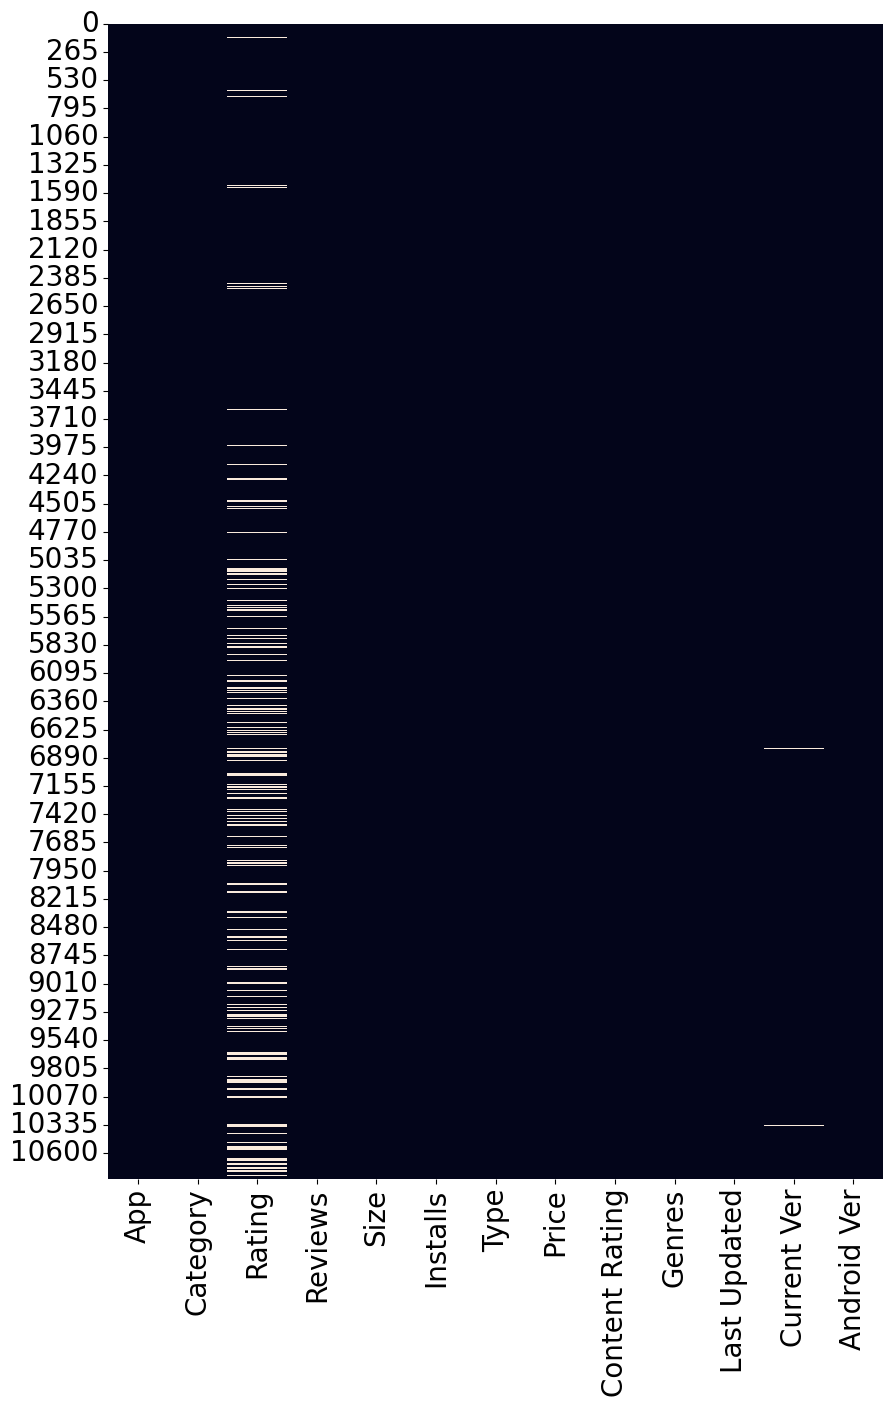

In [291]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(playstore_data_df.isnull(), cbar=False)

This shows that the data has many missing values under the column Rating.
some missing values in column Content Rating and Android Version

<Axes: >

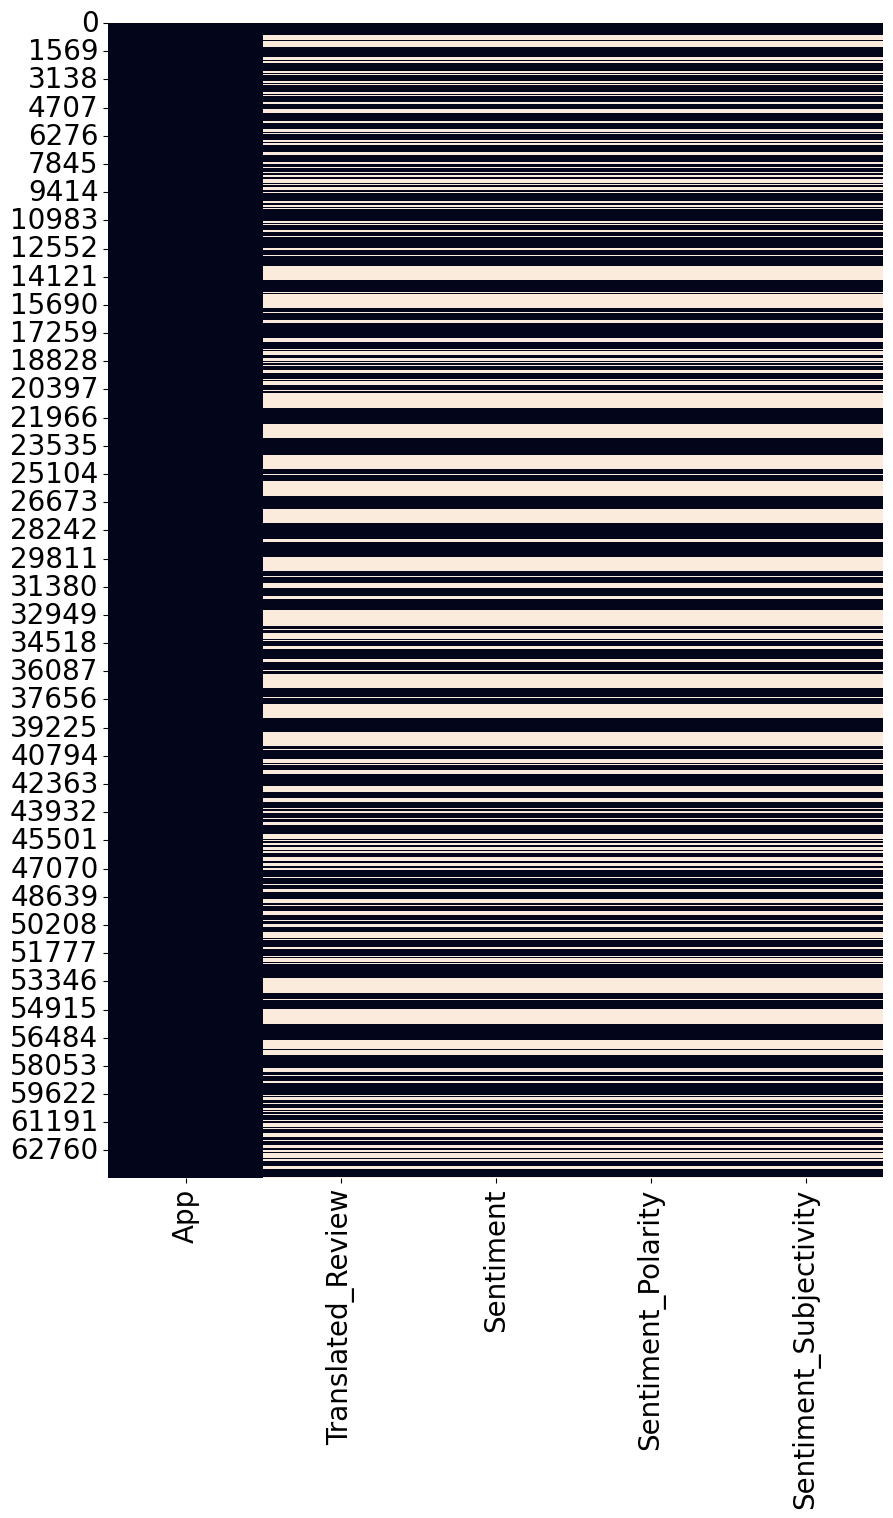

In [292]:
sns.heatmap(user_rewiews_df.isnull(), cbar=False)

This also shows that even the User Reviews csv is also full of missing data

### What did you know about your dataset?

The two datasets given one is about playstore apps information and other is about different apps and users rewiews.
**Dataset1**(playstore_data_df) consists of 10841 rows and 13 columns.In this 483 values are duplicated and 1487 null values.
**Dataset2**(user_rewiews_df) consists of 64295 rows and 5 columns .In this 33616 values are duplicated and in each columns except app column consists 26868 null values.
Both the datasets consists data of type object and float64.

# **2. Understanding Your Variables**

In [293]:
# Dataset Columns
playstore_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [294]:
user_rewiews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [295]:
# Dataset Describe
playstore_data_df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [296]:
user_rewiews_df.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

## **Variables Description**

### **Dataset1- Playstore data**

 **1.App:**  Name of App      
 **2.Category:**  a group of apps that have similar features, functionality, and themes            
 **3.Rating:**   a score or measurement of how good or popular it is.out of 5 rating given by user      
 **4.Reviews:**  Count of reviews given by users       
 **5.Size:**    The memory size needed to install the application.          
 **6.Installs:** The number of times each application has been installed by users        
 **7.Type:**   either it is paid or free        
 **8.Price:**  if paid then price          
 **9.Content Rating**: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.  
 **10.Genres:** The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example         
 **11.Last Updated:** Release date of the most recent update for the app    
 **12.Current Ver:** Current version of the app available on Play Store     
 **13.Android Ver:**The oldest version of Android OS supported by the app.  


### **Dataset2- Users rewiews**

  **1.App:**  Name of the app.                  
  **2.Translated_Review:** Either the original review in English, or a translated version if the orignal review is in another language.       
  **3.Sentiment:** The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.       
  **4.Sentiment_Polarity:** A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.     
  **5.Sentiment_Subjectivity:** A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

### Check Unique Values for each variable.

In [297]:
# Check Unique Values for each variable.
playstore_data_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [298]:
# Number of unique names of app
playstore_data_df['App'].nunique()

9660

In [299]:
playstore_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [300]:
playstore_data_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [301]:
playstore_data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [302]:
playstore_data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [303]:
playstore_data_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [304]:
playstore_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [305]:
playstore_data_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [306]:
user_rewiews_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [307]:
user_rewiews_df['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [308]:
user_rewiews_df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

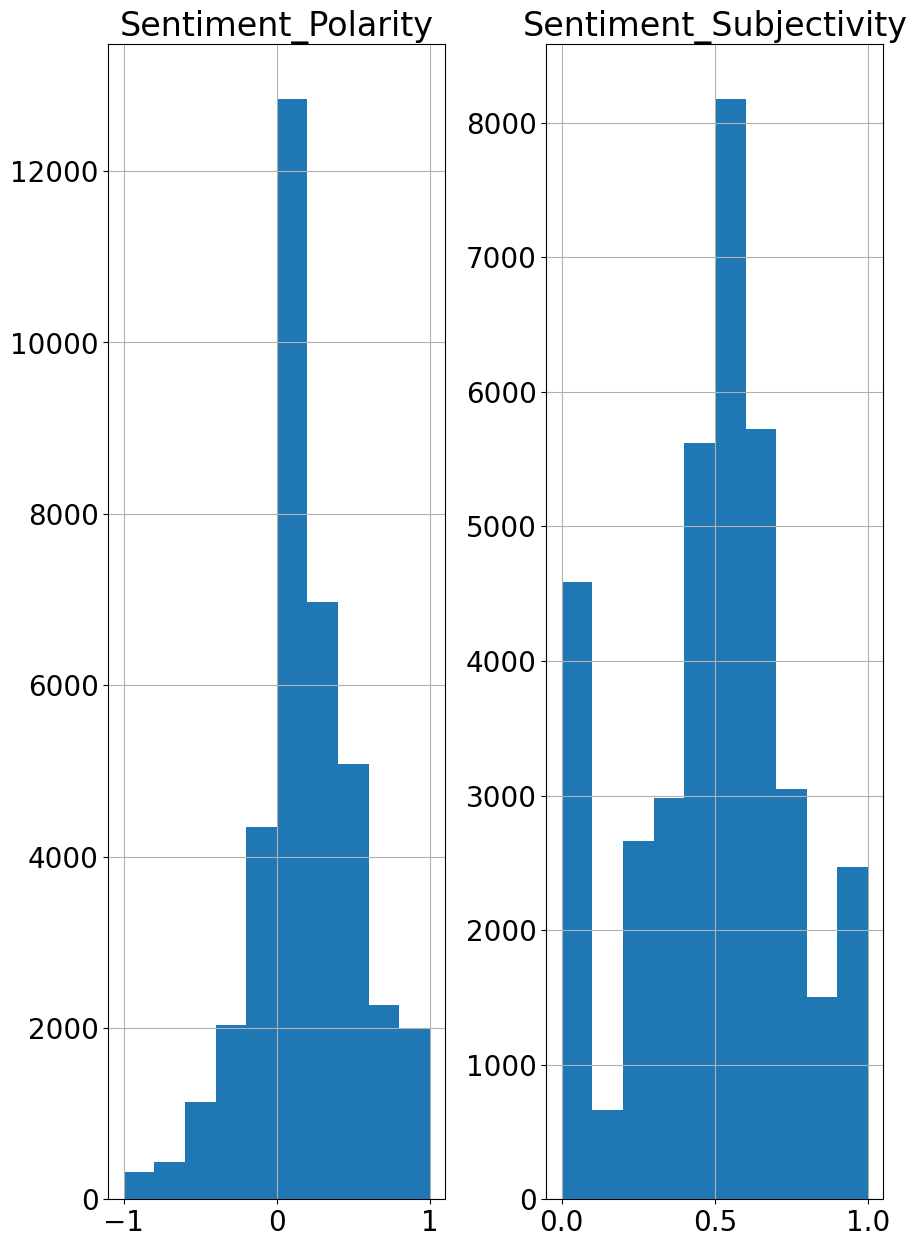

In [309]:
user_rewiews_df.hist();

The value of Sentiment_Polarity ranges between [-1.0,1.0] and Sentiment_Subjectivity ranges between [0.00,1.00]

# **3. Data Wrangling**

 **In this step we are going to:**

**(1) Remove unnecessary columns and rows**

**(2) Check the data type of variables and if required convert them**

**(3) Remove dupplicate and repetative entries if any**

**(4) Treat null values**  


In [310]:
# Making copy of datasets
df1=playstore_data_df.copy()
df2=user_rewiews_df.copy()

### **(1) Remove unnecessary columns and rows**

In [311]:
df1[(df1['Category'] == '1.9')]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

This column has wrong values which lead problem in data manupulation

In [312]:
df1.drop(10472,axis=0,inplace=True)

### **(2)Check the data type of variables and if required convert them**

In [313]:
# Checking the datatype of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Column 'Reviews', 'Size', 'Installs' and 'Price' have the type- 'object'. Hence, we will need to do some data cleaning. We also need to change 'Last updated' column type to datetime.

In [314]:
#For 'Reviews'
# CONVERTING REVIEWS COLUMNS DATA TYPE TO int
df1['Reviews'] =df1['Reviews'].astype(int)
df1['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [315]:
# For 'Installs'
# CHANGING DTYPE OF 'INSTALLS' COLUMN TO int
df1['Installs'] = df1['Installs'].str.replace(',','')
df1['Installs'] = df1['Installs'].str.replace('+','')
df1['Installs'] = df1['Installs'].astype(int)
df1['Installs']

<ipython-input-315-40d9c5542469>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1['Installs'].str.replace('+','')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [316]:
#For 'Price'
# REMOVING '$' SIGN FROM 'PRICE' COLUMN AND CONVERT DTYPE TO FLOAT
df1['Price'] = df1['Price'].str.replace('$','')
df1['Price'] = df1['Price'].astype(float)
df1['Price']

<ipython-input-316-f36d96657697>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$','')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [317]:
df1['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To analyse this column we will convert all the units to MB to easily understand and analyze.

In [318]:
# USER-DEFINED FUNCTION TO CONVERT KB TO MB

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4) #as we know 1MB = 1024KB
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [319]:
df1['Size'] = df1['Size'].apply(lambda x: convert_kb_to_mb(x))
df1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [320]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(x))

In [321]:
df1['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

We successfully converted the 'Size' column datatype to float.

In [322]:
# We have to change this column to datetime
df1["Last Updated"] = pd.to_datetime(df1['Last Updated'])

In [323]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


### **(3)Remove dupplicate and repetative entries if any**

In [324]:
#Dropping/Deleting the duplicate values in playstore dataset
df1.drop_duplicates(inplace = True)
df1.shape

(10357, 13)

Now let us ensure that one app should have one row/observation only. After removing duplicates, we have left 10357 rows, which means number of unique apps should also be the same. Let's find out

In [325]:
# Checking number of unique apps
df1['App'].nunique()

9659

Number of unique apps in the dataset are 9660 but still there are 696 extra entries. Let's find out what is leading us to this discrepancy.

In [326]:
df1['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [327]:
df1.loc[df1['App'] == 'ROBLOX']

App Category  Rating  Reviews  Size   Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388  67.0  100000000  Free    0.0   
1701  ROBLOX     GAME     4.5  4447346  67.0  100000000  Free    0.0   
1748  ROBLOX     GAME     4.5  4448791  67.0  100000000  Free    0.0   
1841  ROBLOX     GAME     4.5  4449882  67.0  100000000  Free    0.0   
1870  ROBLOX     GAME     4.5  4449910  67.0  100000000  Free    0.0   
2016  ROBLOX   FAMILY     4.5  4449910  67.0  100000000  Free    0.0   
2088  ROBLOX   FAMILY     4.5  4450855  67.0  100000000  Free    0.0   
2206  ROBLOX   FAMILY     4.5  4450890  67.0  100000000  Free    0.0   
4527  ROBLOX   FAMILY     4.5  4443407  67.0  100000000  Free    0.0   

     Content Rating                        Genres Last Updated   Current Ver  \
1653   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1701   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1748   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1841   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
1870   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2016   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2088   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
2206   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   
4527   Everyone 10+  Adventure;Action & Adventure   2018-07-31  2.347.225742   

     Android Ver  
1653  4.1 and up  
1701  4.1 and up  
1748  4.1 and up  
1841  4.1 and up  
1870  4.1 and up  
2016  4.1 and up  
2088  4.1 and up  
2206  4.1 and up  
4527  4.1 and up

In [328]:
df1.loc[df1['App'] == 'ROBLOX']['Reviews'].max()

4450890

Here we can see that there are many apps having multiple entries even after removing duplicates such as 'ROBLOX'. After observation we found that these entries differ in terms of number of reviews. These must have been from different points of time. We are going to keep only that row which has highest number of reviews, assuming it to be the latest one.

In [329]:
# Keeping only that row for each app which has the highest number of reviews
df1 = df1.loc[df1.groupby('App')['Reviews'].idxmax(),:]
df1

App       Category  Rating  \
8884              "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     NaN   
8532                     +Download 4 Instagram Twitter         SOCIAL     4.5   
324                         - Free Comics - Comic Apps         COMICS     3.5   
4541                                                .R          TOOLS     4.5   
4636                                            /u/app  COMMUNICATION     4.7   
...                                                ...            ...     ...   
6334                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS     NaN   
4362                                        💎 I'm rich      LIFESTYLE     3.8   
2575     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL     4.6   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS     4.0   
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   

      Reviews     Size  Installs  Type   Price Content Rating  \
8884       27   3.6000       500  Free    0.00       Everyone   
8532    40467  22.0000   1000000  Free    0.00       Everyone   
324       115   9.1000     10000  Free    0.00     Mature 17+   
4541      259   0.1982     10000  Free    0.00       Everyone   
4636      573  53.0000     10000  Free    0.00     Mature 17+   
...       ...      ...       ...   ...     ...            ...   
6334      414  59.0000    100000  Free    0.00     Mature 17+   
4362      718  26.0000     10000  Paid  399.99       Everyone   
2575    22098  18.0000   1000000  Free    0.00       Everyone   
7559       19   3.2000     10000  Free    0.00       Everyone   
882     11661   4.0000   1000000  Free    0.00       Everyone   

                       Genres Last Updated Current Ver   Android Ver  
8884                   Sports   2017-10-07        0.22    4.1 and up  
8532                   Social   2018-08-02        5.03    4.1 and up  
324                    Comics   2018-07-13      5.0.12    5.0 and up  
4541                    Tools   2014-09-16      1.1.06    1.5 and up  
4636            Communication   2018-07-03       4.2.4    4.1 and up  
...                       ...          ...         ...           ...  
6334  Video Players & Editors   2018-07-18       4.0.7  4.0.3 and up  
4362                Lifestyle   2018-03-11       1.0.0    4.4 and up  
2575                   Social   2018-07-24       4.2.4  4.0.3 and up  
7559                    Tools   2017-10-21         1.0    4.2 and up  
882             Entertainment   2018-07-14     1.1.3.2  4.0.3 and up  

[9659 rows x 13 columns]

### **(4) Treat null values**

**1. Android Ver: There are a total of 2 NaN values in this column.**

In [330]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [331]:
# DROPPING THE ROWS CORRESPONDING TO THE NaN VALUES IN THE 'ANDROID VER' COLUMN
df1=df1[df1['Android Ver'].notna()]


**2. Current Ver: There are a total of 8 NaN values in this column.**

In [332]:
#DROPPING ROWS CORRESPONDING TO THE VALUES WHICH CONTAIN NaN IN THE COLUMN 'CURRENT VER'

df1=df1[df1["Current Ver"].notna()]

**3. Type: There is only one NaN value in this column.**

In [333]:
# THE ROW CONTAINING NaN VALUES IN THE TYPE COLUMN
df1[df1["Type"].isnull()]

App Category  Rating  Reviews  Size  Installs  \
9148  Command & Conquer: Rivals   FAMILY     NaN        0   0.0         0   

     Type  Price Content Rating    Genres Last Updated         Current Ver  \
9148  NaN    0.0   Everyone 10+  Strategy   2018-06-28  Varies with device   

             Android Ver  
9148  Varies with device

In [334]:
# Since this row does not have much information in other aspects too, we are going to remove it.
df1.drop(9148,axis=0,inplace=True)


<ipython-input-334-c2c0facc32f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(9148,axis=0,inplace=True)


**4. Rating: This column contains 1461 NaN values.**

we know that the rating of any app in the Play Store will be in between 1 and 5. Let us check whether there are any ratings out of this range.

In [335]:
df1[(df1['Rating'] <1) | (df1['Rating']>5)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

The Rating column contains 1461 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis. The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column

In [336]:
# FINDING MEAN AND MEDIAN IN THE RATING COLUMN EXCLUDING THE NaN VALUES

mean_rating = round(df1[~df1['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df1[~df1['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1733, 4.3]

Visualization of distribution of rating using displot and detecting the outliers through boxplot.

<ipython-input-337-c91388c18e38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Rating'],color='firebrick',ax=ax[0])


<Axes: xlabel='Rating'>

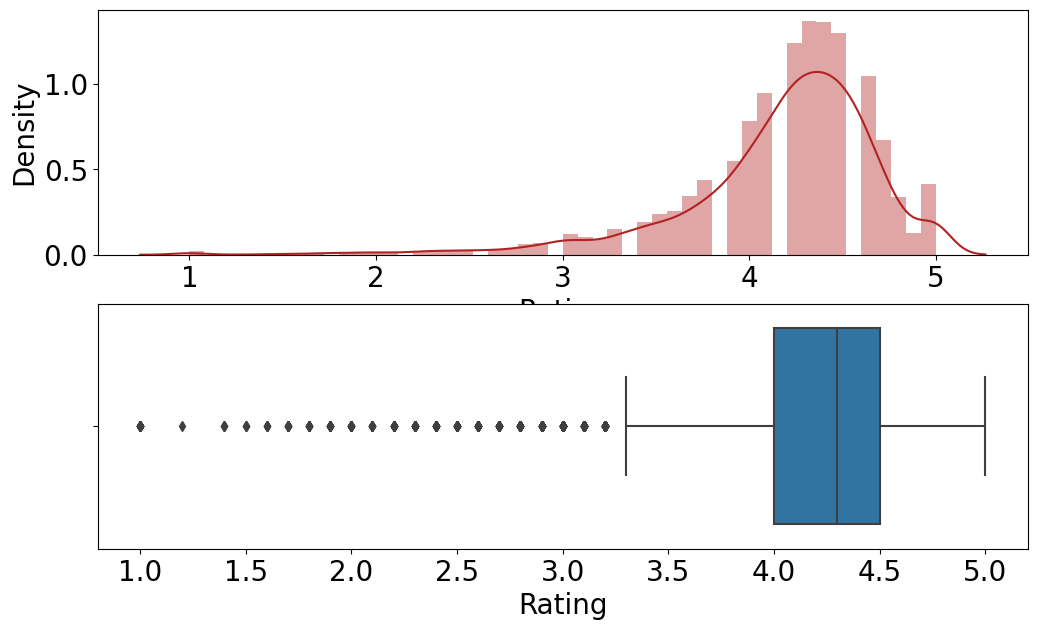

In [337]:
df1.isnull().sum()
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df1['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=df1, ax=ax[1])

The mean of the average ratings (excluding the NaN values) comes to be 4.18.

The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

From the distplot visualizations, it is clear that the ratings are left skewed.

We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the Rating column with its median

In [338]:
# REPLACING THE NaN VALUES IN THE 'RATING' COLUMN WITH ITS MEDIAN VALUE
df1['Rating'].fillna(value=median_rating,inplace=True)
df1.shape

(9648, 13)

In [339]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

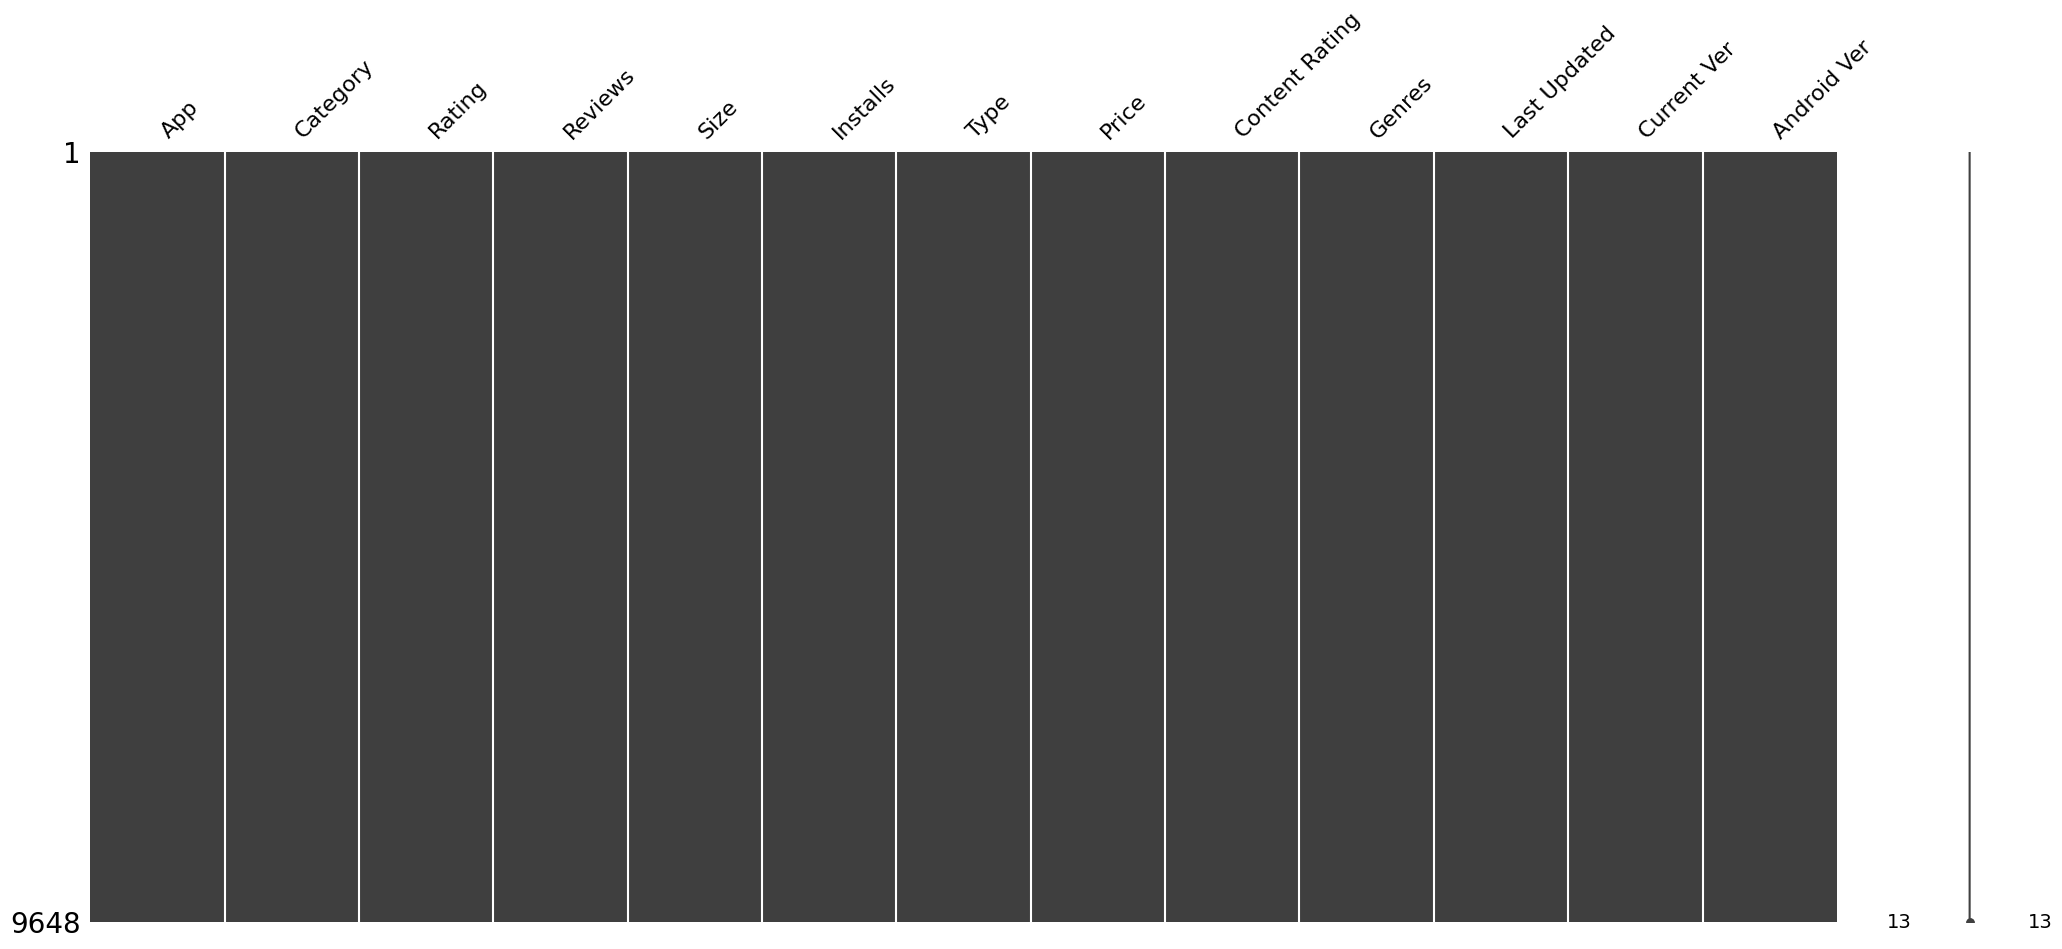

In [340]:
import missingno as msno
msno.matrix(df1)
plt.show()

Showing that there is no missing value left in the data and that it is more presentable and suitable for analysis.

**# So, We sucessfully handled the Null values that was present in our dataset**

# **Lets analyze and clean our 2nd dataset**


In [341]:
# FINDING THE TOTAL NUMBER OF NaN VALUES IN EACH COLUMN
df2.isnull().sum()


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [342]:
#Dropping/Deleting the duplicate values in user rewiews dataset
#Keeping only non-null rows
df2 =df2[~df2['Translated_Review'].isnull()]
df2.shape

(37427, 5)

We are going to remove those rows which have missing 'Translated_Review'.

In [343]:
#Checking for duplicates
df2.duplicated().sum()

7735

In [344]:
#Removing duplicates
df2 = df2.drop_duplicates().reset_index(drop=True)

In [345]:
df2

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
29687  Housing-Real Estate & Property   
29688  Housing-Real Estate & Property   
29689  Housing-Real Estate & Property   
29690  Housing-Real Estate & Property   
29691  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
29687  Most ads older many agents ..not much owner po...  Positive   
29688  If photos posted portal load, fit purpose. I'm...  Positive   
29689  Dumb app, I wanted post property rent give opt...  Negative   
29690  I property business got link SMS happy perform...  Positive   
29691  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
29687            0.173333                0.486667  
29688            0.225000                0.447222  
29689           -0.287500                0.250000  
29690            0.800000                1.000000  
29691           -0.316667                0.400000  

[29692 rows x 5 columns]

In [346]:
# FINDING THE SHAPE OF THE UPDATED DATASET
df2.shape

(29692, 5)

In [347]:
# FINDING THE TOTAL NUMBER OF NaN VALUES IN EACH COLUMN
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [348]:
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
29687  Housing-Real Estate & Property   
29688  Housing-Real Estate & Property   
29689  Housing-Real Estate & Property   
29690  Housing-Real Estate & Property   
29691  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
29687  Most ads older many agents ..not much owner po...  Positive   
29688  If photos posted portal load, fit purpose. I'm...  Positive   
29689  Dumb app, I wanted post property rent give opt...  Negative   
29690  I property business got link SMS happy perform...  Positive   
29691  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
29687            0.173333                0.486667  
29688            0.225000                0.447222  
29689           -0.287500                0.250000  
29690            0.800000                1.000000  
29691           -0.316667                0.400000  

[29692 rows x 5 columns]

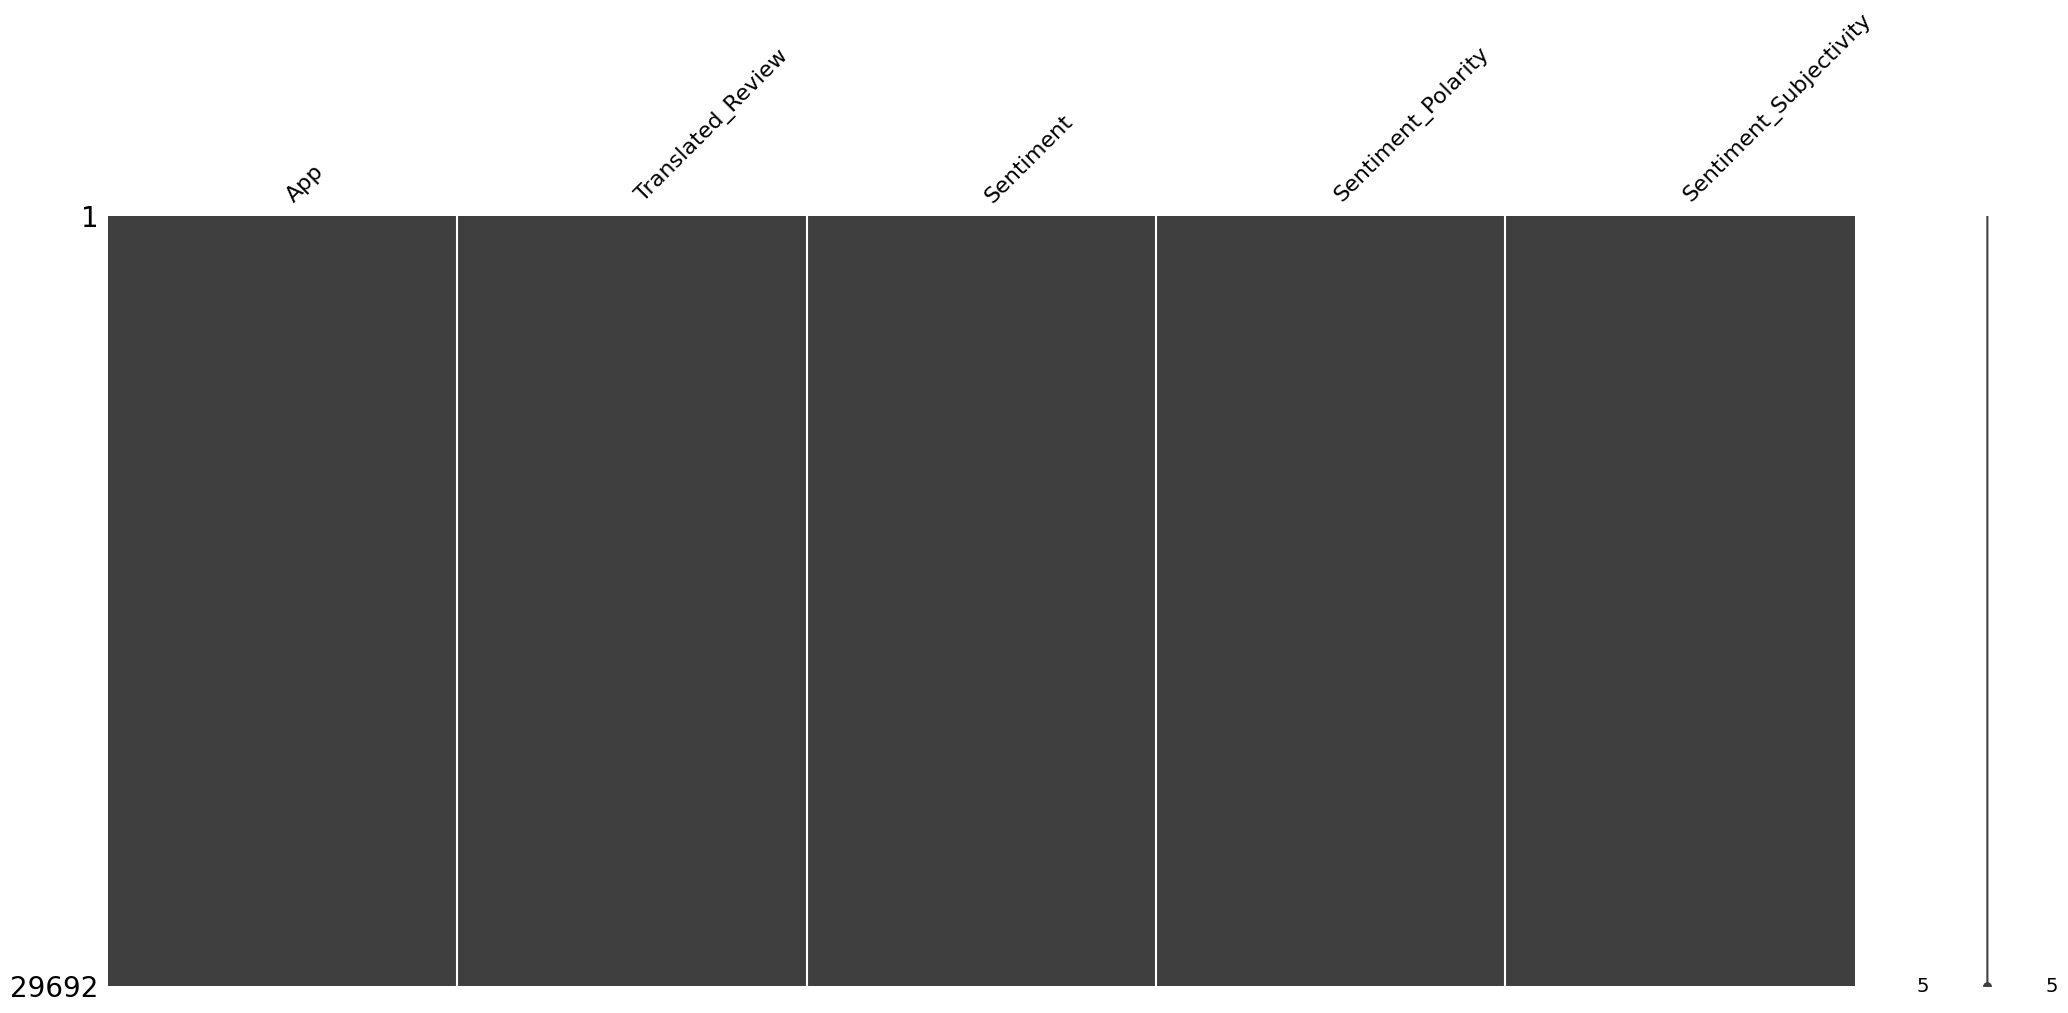

In [349]:
msno.matrix(df2)
plt.show()

This shows that the missing data in the User Data has been removed successfully

### **Merging dataframes on apps**

In [350]:
# MERGING THE TWO DATASETS TO GET THE FINAL ONE

df = df1.merge(df2, on="App")
df

App            Category  Rating  Reviews  \
0               10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
1               10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
2               10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
3               10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
4               10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
...                               ...                 ...     ...      ...   
28245  Housing-Real Estate & Property           LIFESTYLE     4.1    28301   
28246  Housing-Real Estate & Property           LIFESTYLE     4.1    28301   
28247  Housing-Real Estate & Property           LIFESTYLE     4.1    28301   
28248  Housing-Real Estate & Property           LIFESTYLE     4.1    28301   
28249  Housing-Real Estate & Property           LIFESTYLE     4.1    28301   

       Size  Installs  Type  Price Content Rating            Genres  \
0       3.8    500000  Free    0.0   Everyone 10+  Health & Fitness   
1       3.8    500000  Free    0.0   Everyone 10+  Health & Fitness   
2       3.8    500000  Free    0.0   Everyone 10+  Health & Fitness   
3       3.8    500000  Free    0.0   Everyone 10+  Health & Fitness   
4       3.8    500000  Free    0.0   Everyone 10+  Health & Fitness   
...     ...       ...   ...    ...            ...               ...   
28245   0.0   1000000  Free    0.0       Everyone         Lifestyle   
28246   0.0   1000000  Free    0.0       Everyone         Lifestyle   
28247   0.0   1000000  Free    0.0       Everyone         Lifestyle   
28248   0.0   1000000  Free    0.0       Everyone         Lifestyle   
28249   0.0   1000000  Free    0.0       Everyone         Lifestyle   

      Last Updated Current Ver   Android Ver  \
0       2017-02-17         1.9  2.3.3 and up   
1       2017-02-17         1.9  2.3.3 and up   
2       2017-02-17         1.9  2.3.3 and up   
3       2017-02-17         1.9  2.3.3 and up   
4       2017-02-17         1.9  2.3.3 and up   
...            ...         ...           ...   
28245   2018-07-13      12.1.0    4.1 and up   
28246   2018-07-13      12.1.0    4.1 and up   
28247   2018-07-13      12.1.0    4.1 and up   
28248   2018-07-13      12.1.0    4.1 and up   
28249   2018-07-13      12.1.0    4.1 and up   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
28245  Most ads older many agents ..not much owner po...  Positive   
28246  If photos posted portal load, fit purpose. I'm...  Positive   
28247  Dumb app, I wanted post property rent give opt...  Negative   
28248  I property business got link SMS happy perform...  Positive   
28249  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
28245            0.173333                0.486667  
28246            0.225000                0.447222  
28247           -0.287500                0.250000  
28248            0.800000                1.000000  
28249           -0.316667                0.400000  

[28250 rows x 17 columns]

In the merged dataframe, we have four new columns i.e.. Translated_Review, Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1]

In [351]:
df.shape

(28250, 17)

**We successfully completed the data cleaning process. Let us now deep dive into Data Exploration and Visualization to gather important insights from our dataset.**

# **Data Exploration--Univariate & Bivariate Analysis**

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

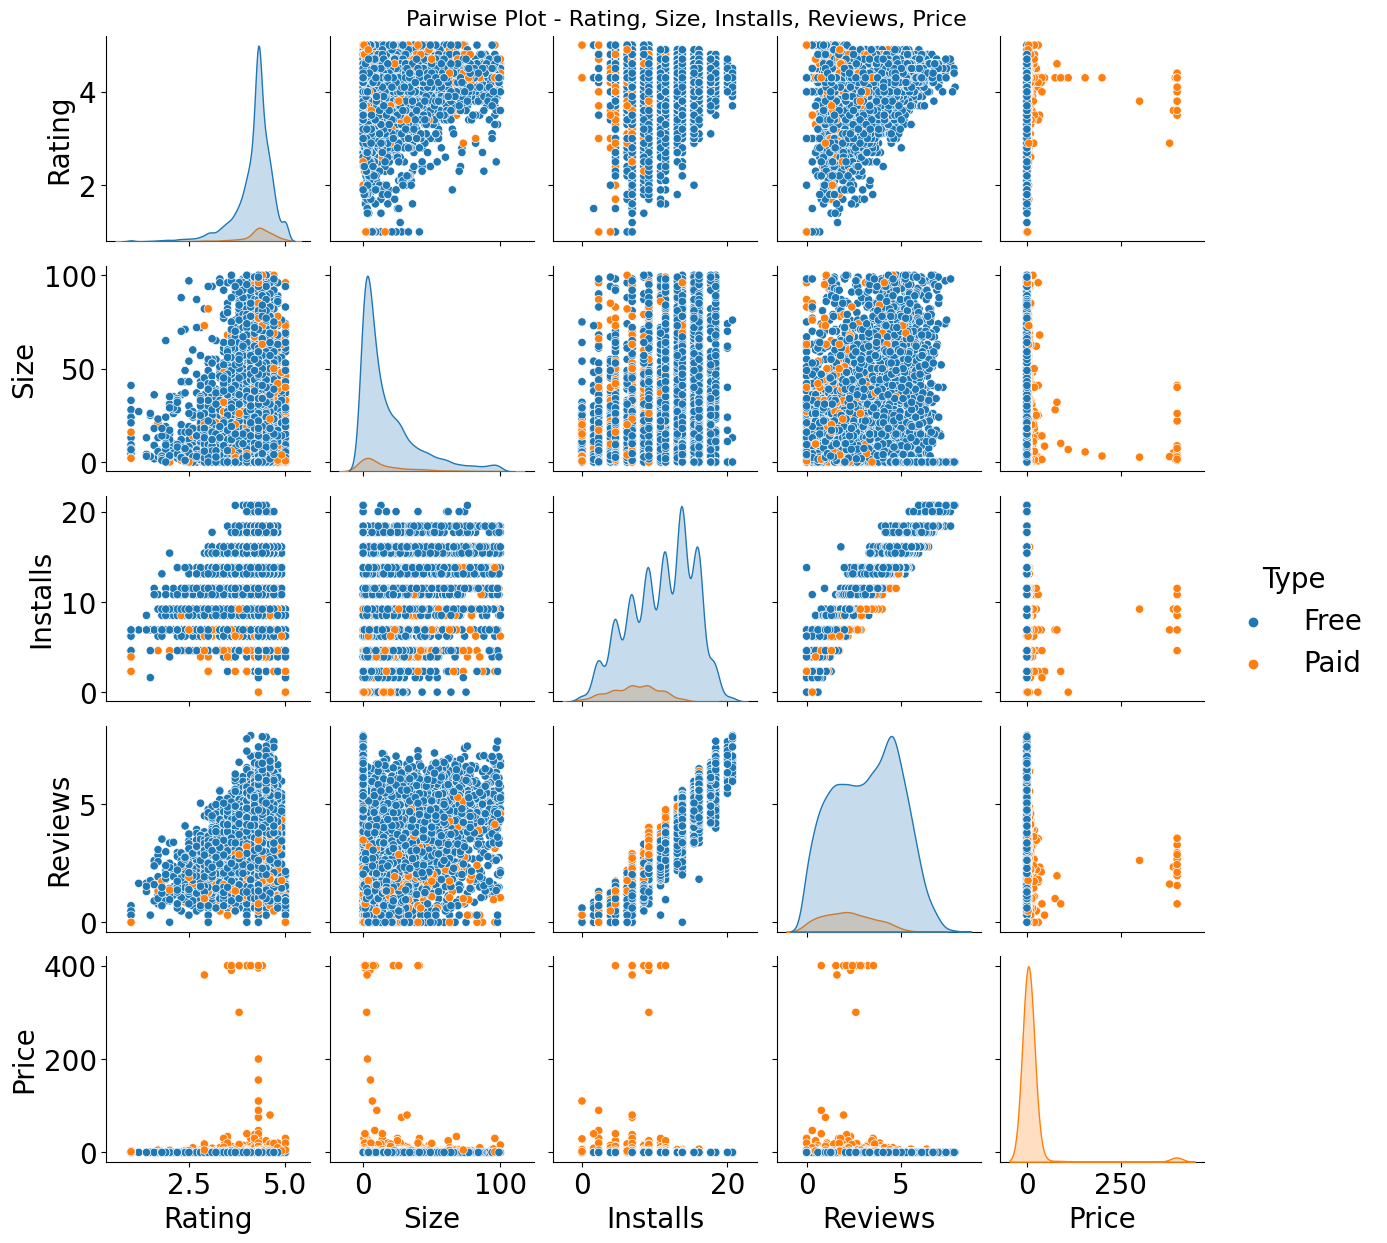

In [352]:
#PLOTTING A PAIRWISE PLOT TO LOOK FOR ANY RELATIONSHIP
Rating = df1['Rating']
Size = df1['Size']
Installs = df1['Installs']
Reviews = df1['Reviews']
Type = df1['Type']
Price = df1['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)
#plt.savefig('relationship_pairplot.png') #saving the chart for presentation

**FINDINGS**

* Most of the App are Free.

* Most of the Paid Apps have Rating around 4
As the number of installation increases the number of reviews of the particaular app also increases.

* Most of the Apps are light-weighted

In [353]:
df.corr()

<ipython-input-353-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Rating   Reviews      Size  Installs     Price  \
Rating                  1.000000  0.042570  0.059140  0.026649 -0.013171   
Reviews                 0.042570  1.000000  0.083848  0.628468 -0.015334   
Size                    0.059140  0.083848  1.000000 -0.034121  0.011581   
Installs                0.026649  0.628468 -0.034121  1.000000 -0.020184   
Price                  -0.013171 -0.015334  0.011581 -0.020184  1.000000   
Sentiment_Polarity      0.111277 -0.068875 -0.100761 -0.052880  0.021172   
Sentiment_Subjectivity  0.075159 -0.004947  0.015459 -0.004725 -0.000417   

                        Sentiment_Polarity  Sentiment_Subjectivity  
Rating                            0.111277                0.075159  
Reviews                          -0.068875               -0.004947  
Size                             -0.100761                0.015459  
Installs                         -0.052880               -0.004725  
Price                             0.021172               -0.000417  
Sentiment_Polarity                1.000000                0.271602  
Sentiment_Subjectivity            0.271602                1.000000

<ipython-input-354-47d3514d0dfc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True,cmap='ocean')


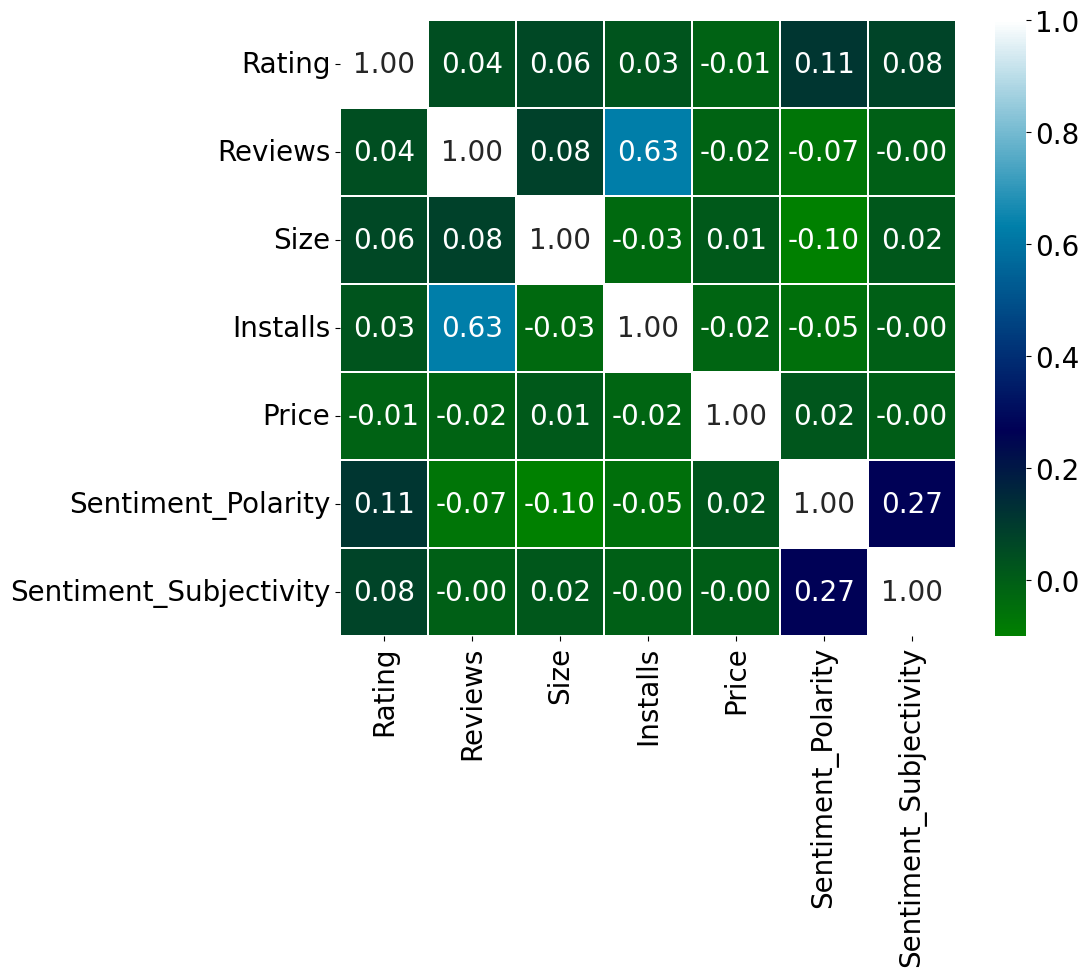

In [354]:
# Heatmap for cheking correlation between columns in Playstore DataFrame.
fig, axes =plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True,cmap='ocean')
plt.show()
#plt.savefig('ps_heatmap.png')

Number of Reviews is highly correlated with the number of Installs of the application

In [355]:

df2.corr()

<ipython-input-355-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


Sentiment_Polarity  Sentiment_Subjectivity
Sentiment_Polarity                1.000000                0.272284
Sentiment_Subjectivity            0.272284                1.000000

<ipython-input-356-c55d09c44734>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df2.corr()


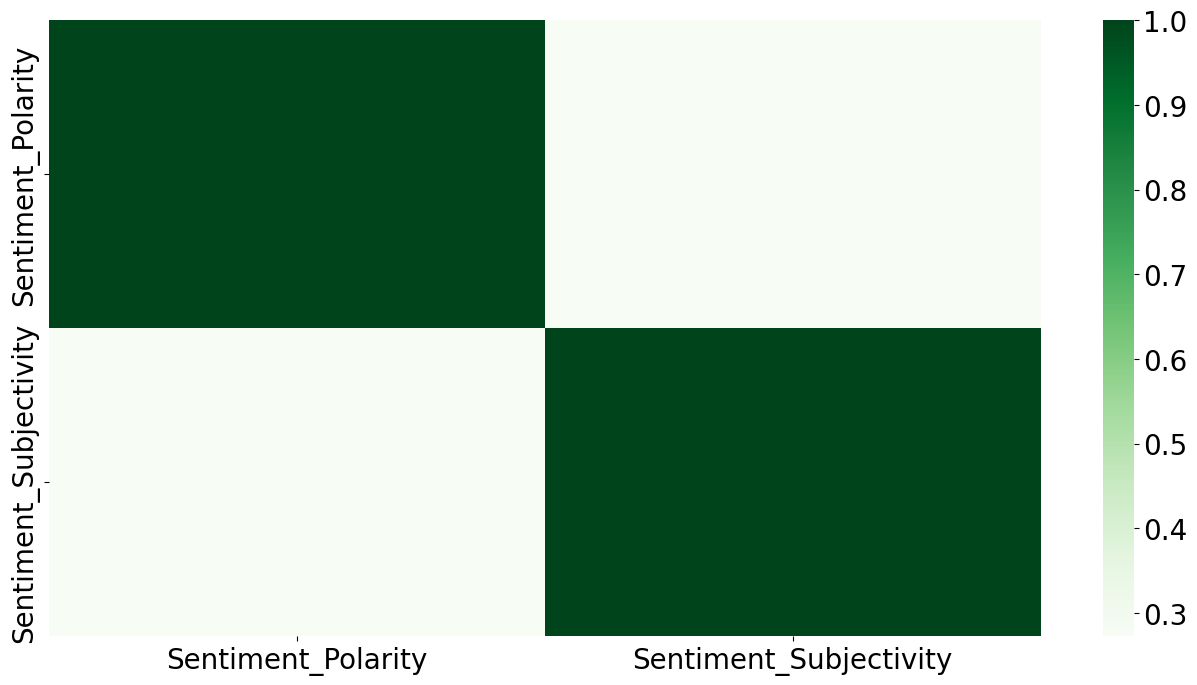

In [356]:
# Heat map for user_review
plt.figure(figsize=(16,8))
corr= df2.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

####**Chart - 1: Find out the number of Apps per category.**

In [357]:
# GROUPING THE NUMBER OF APPS BY CATEGORY
app_count_per_category = df1.groupby(['Category'])['App'].count().sort_values(ascending= False)
count_df=pd.DataFrame(app_count_per_category)
count_df

App
Category                 
FAMILY               1870
GAME                  946
TOOLS                 827
BUSINESS              420
MEDICAL               395
PRODUCTIVITY          374
PERSONALIZATION       374
LIFESTYLE             369
FINANCE               345
SPORTS                325
COMMUNICATION         315
HEALTH_AND_FITNESS    288
PHOTOGRAPHY           281
NEWS_AND_MAGAZINES    254
SOCIAL                239
BOOKS_AND_REFERENCE   221
TRAVEL_AND_LOCAL      219
SHOPPING              202
DATING                170
VIDEO_PLAYERS         164
MAPS_AND_NAVIGATION   131
FOOD_AND_DRINK        112
EDUCATION             107
ENTERTAINMENT          87
AUTO_AND_VEHICLES      85
LIBRARIES_AND_DEMO     83
WEATHER                79
HOUSE_AND_HOME         73
EVENTS                 64
PARENTING              60
ART_AND_DESIGN         60
COMICS                 56
BEAUTY                 53

<Axes: xlabel='Category'>

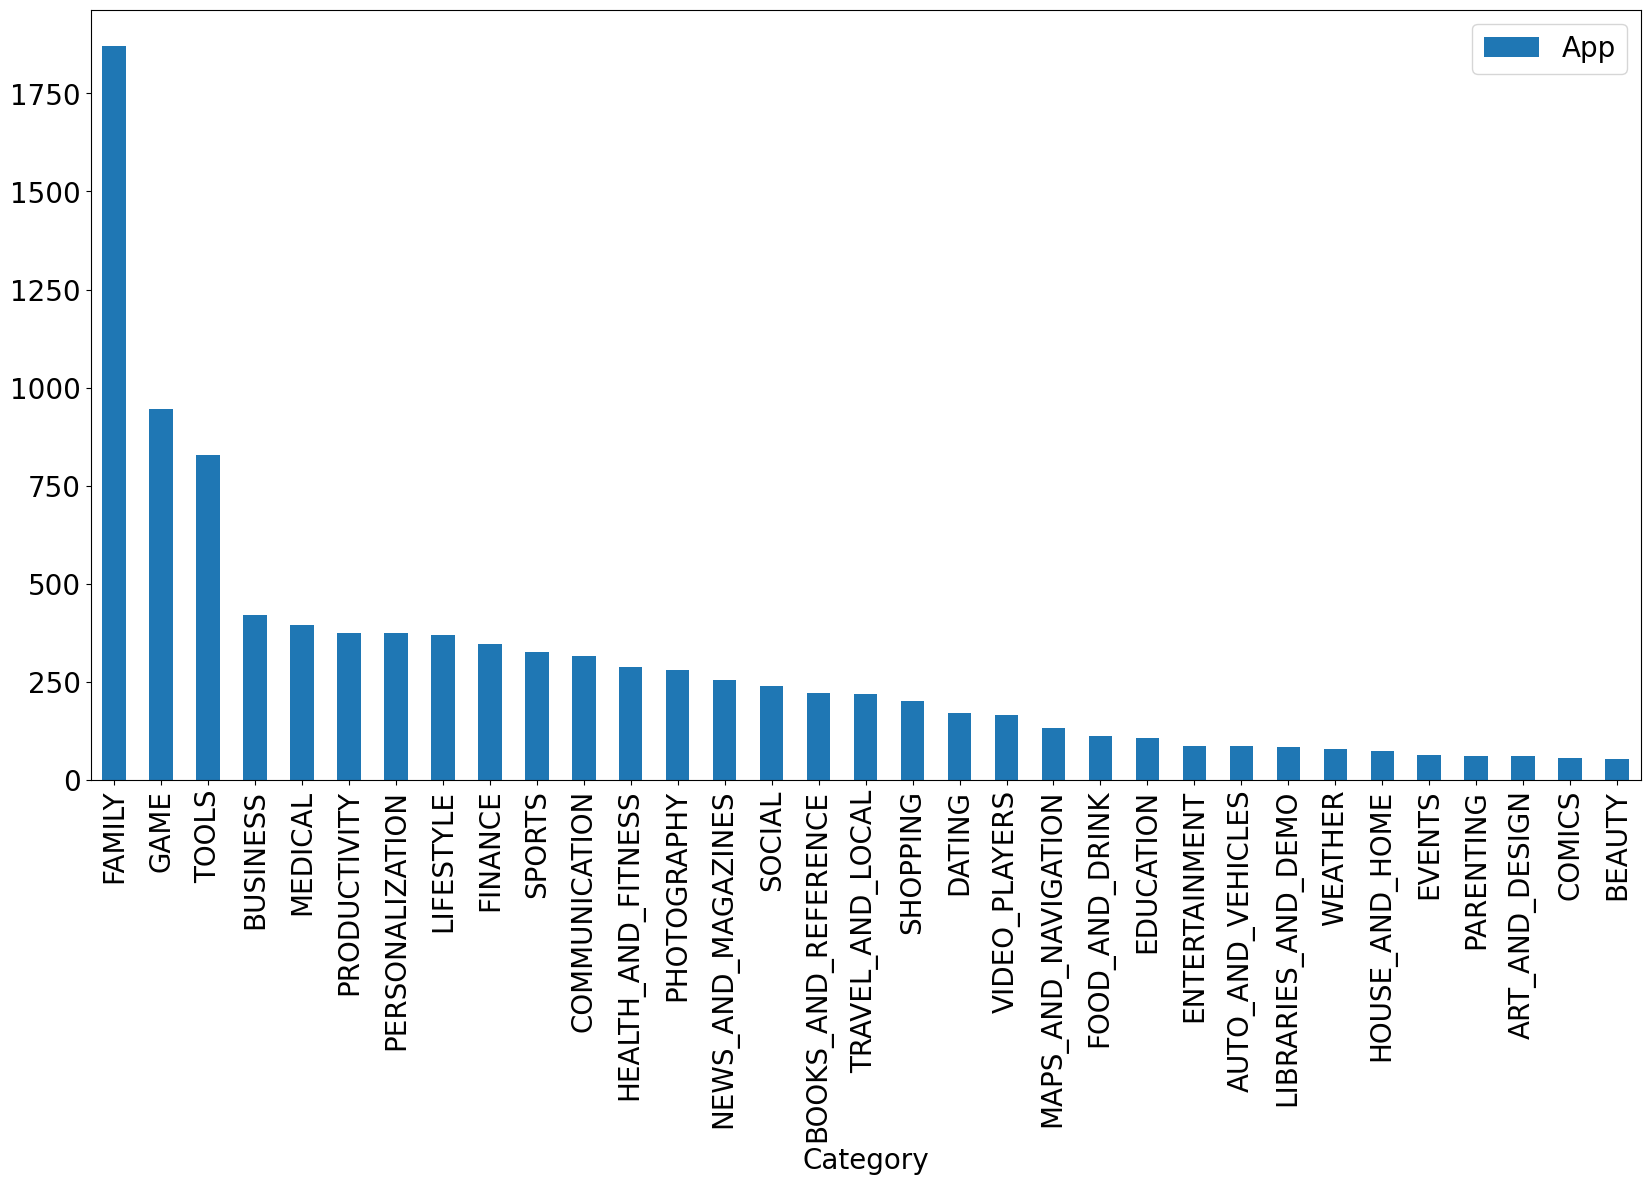

In [358]:
# SETTING THE SIZE OF THE GRAPH
plt.rcParams['figure.figsize'] = (20, 10)

# PLOTTING THE BAR GRAPH
count_df.plot(kind='bar')
#plt.savefig('most_apps_per_category.png')

**Findings**

* The above bar graph represents the distribution of number of apps in different categories in the Play Store. It can be infered that FAMILY Category has the maximum number of Apps.

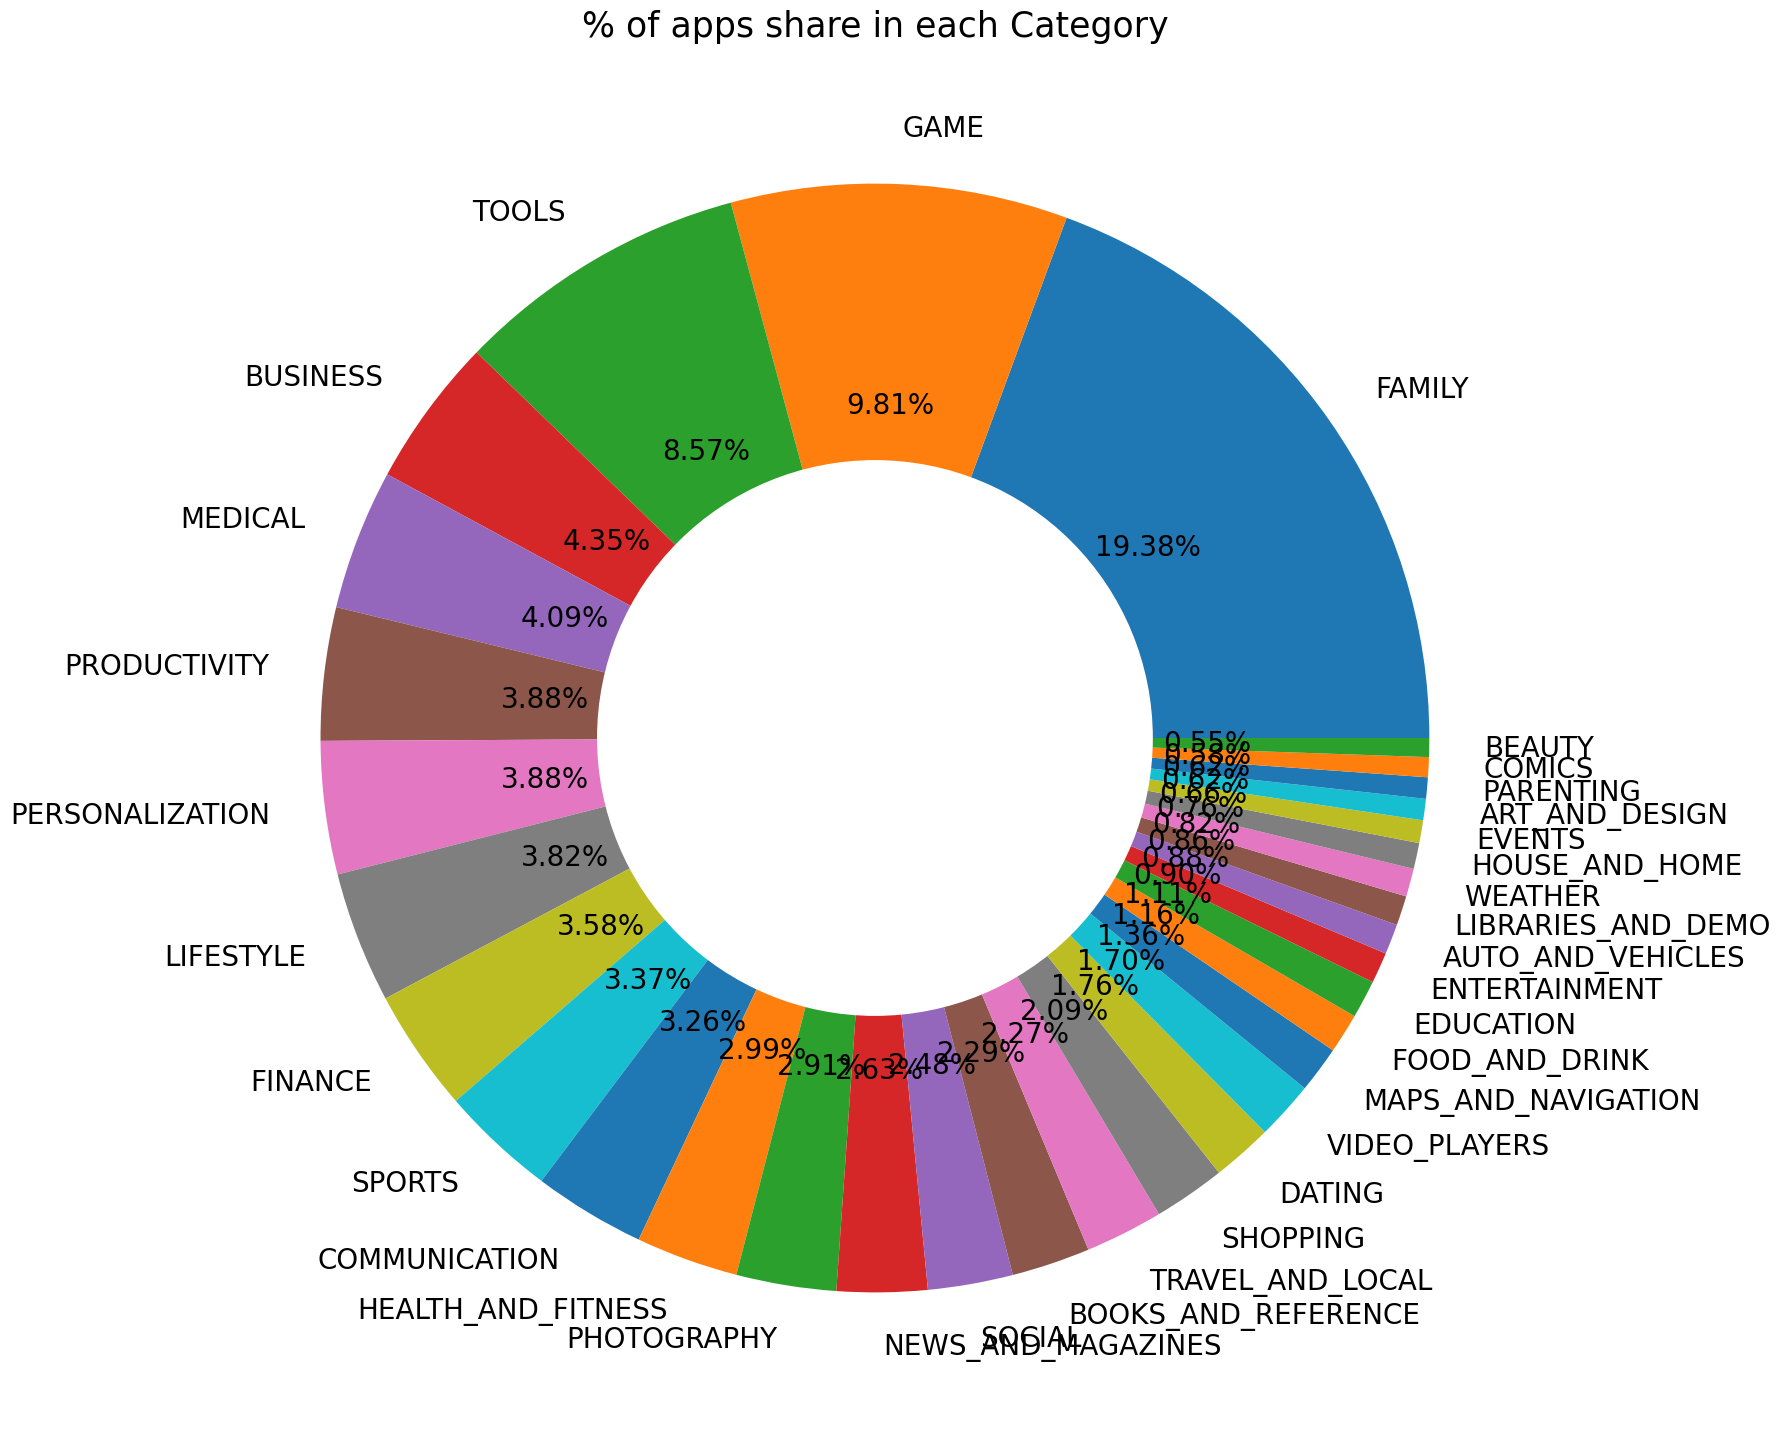

In [359]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(df1.Category.value_counts(), labels=df1.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

#### **Chart - 2: Which category of App has more installs?**

In [360]:
# unique values in installs
df['Installs'].unique()

array([    500000,   10000000,    1000000,     100000,   50000000,
            10000,  100000000,    5000000,      50000,  500000000,
             1000, 1000000000])

In [361]:
# grouping by category
grouping=df.groupby('Category')

# taking sum of installs values of each category
group_install=grouping.Installs.sum()

Text(0, 0.5, 'Installs--->')

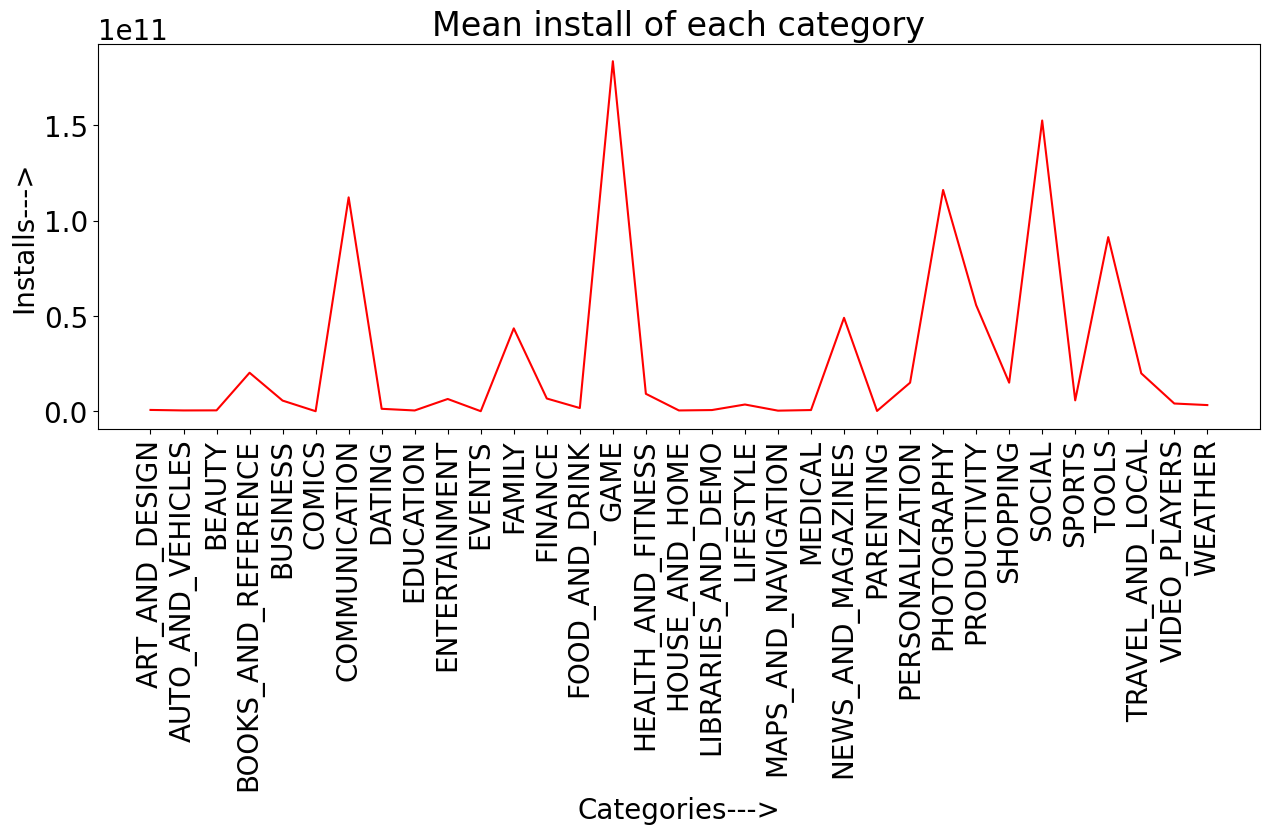

In [362]:
# line plot
plt.figure(figsize=(15,5))
plt.plot(group_install, color='r')
plt.xticks(rotation=90)
plt.title('Mean install of each category')
plt.xlabel('Categories--->')
plt.ylabel('Installs--->')

**Findings**

The Top 5 Categories according to number of installes are:-

* Game
* Communication
* Tools
* Productivity
* Social

When it comes to which categories have highest number of installs, the answer is a little bit different from the previous analysis. In this case, 'Game', and 'Social' have topped the list. They have more number of installs compared to any other category.

#### **Chart - 3: Average rating of the apps**

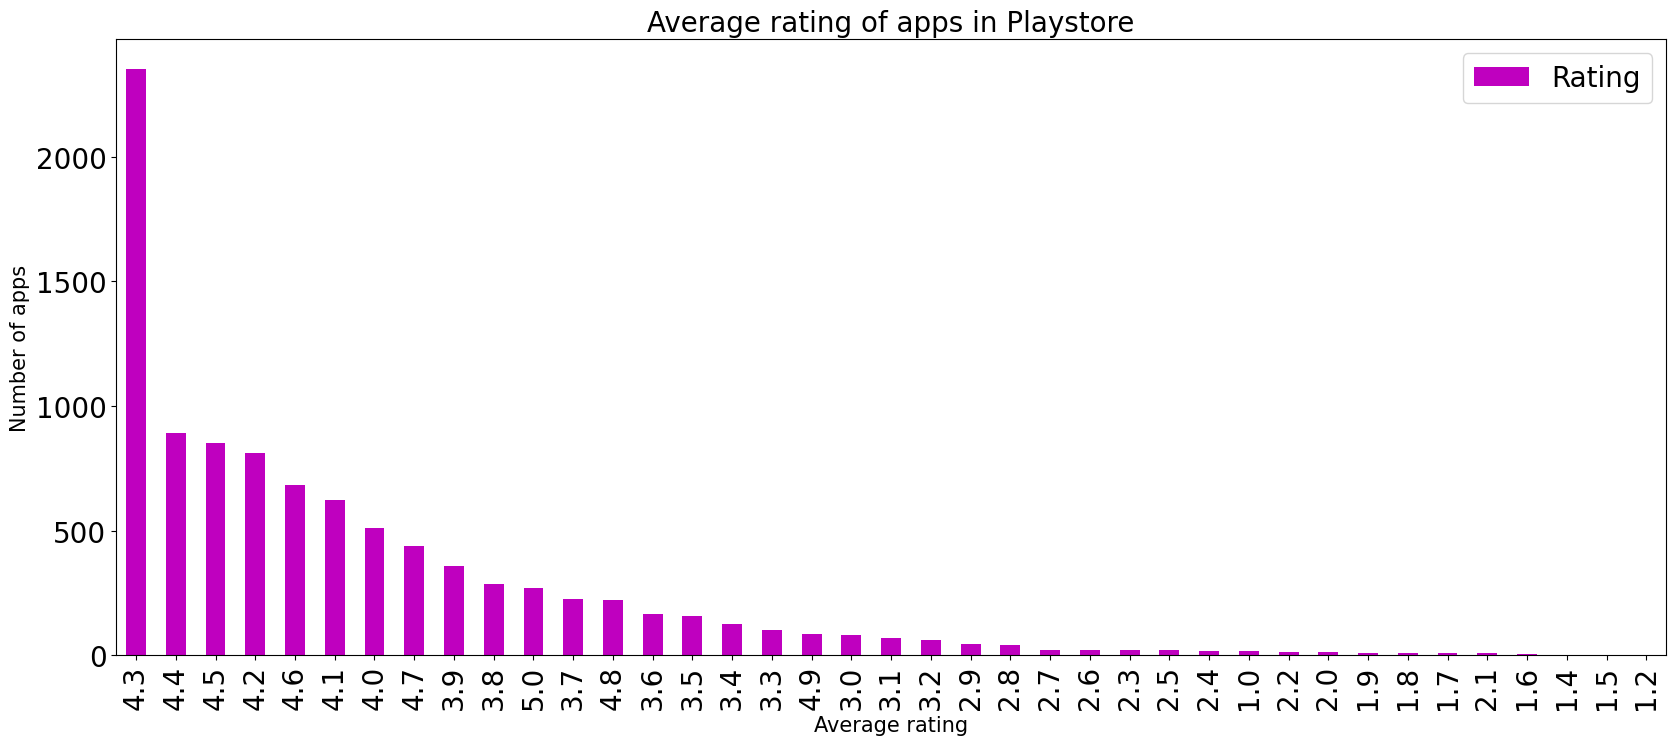

In [363]:
df1['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

**Lets create a new column `Rating group` in the main dataframe and apply these filters.**

In [364]:
# Defining a function grouped_rating to group the ratings as mentioned above
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

**Lets apply the `grouped_rating` function on the Rating column and save the output in new column named as `Rating group` in the main df**.

In [365]:
# Applying grouped_rating function
df1['Rating_group']=df1['Rating'].apply(lambda x: Rating_app(x))

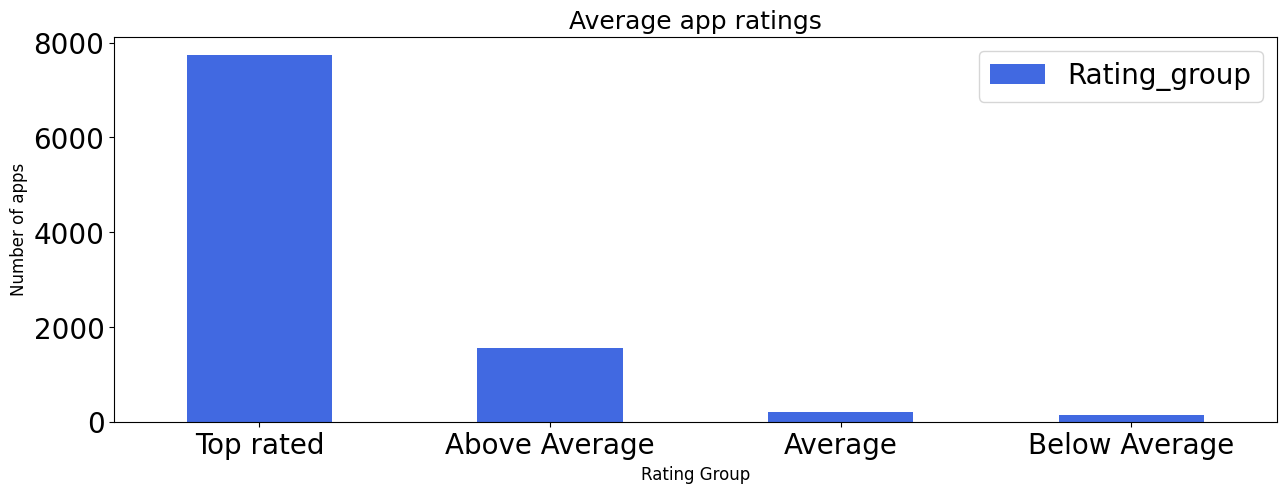

In [366]:
# Average app ratings
df1['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

#### **Chart - 4: Which category of App is most popular on Play store based on Ratings**

In [367]:
# Taking mean of rating , rewiews , price for each category
group_rating=grouping.Rating.mean()
group_review=grouping.Reviews.mean()
group_Price=grouping.Price.mean()

#printing mean values
print(group_rating)
print(group_Price)
print(group_review)

Category
ART_AND_DESIGN         4.358683
AUTO_AND_VEHICLES      4.579505
BEAUTY                 4.263722
BOOKS_AND_REFERENCE    4.369854
BUSINESS               4.255556
COMICS                 4.311111
COMMUNICATION          4.240702
DATING                 4.079577
EDUCATION              4.172447
ENTERTAINMENT          4.097290
EVENTS                 4.335256
FAMILY                 4.338205
FINANCE                4.252844
FOOD_AND_DRINK         4.368611
GAME                   4.442615
HEALTH_AND_FITNESS     4.405367
HOUSE_AND_HOME         4.141573
LIBRARIES_AND_DEMO     4.055422
LIFESTYLE              4.190048
MAPS_AND_NAVIGATION    4.318519
MEDICAL                4.130796
NEWS_AND_MAGAZINES     4.242838
PARENTING              4.251563
PERSONALIZATION        4.339438
PHOTOGRAPHY            4.307947
PRODUCTIVITY           4.352511
SHOPPING               4.227273
SOCIAL                 4.134947
SPORTS                 4.278947
TOOLS                  4.242275
TRAVEL_AND_LOCAL       4.290458

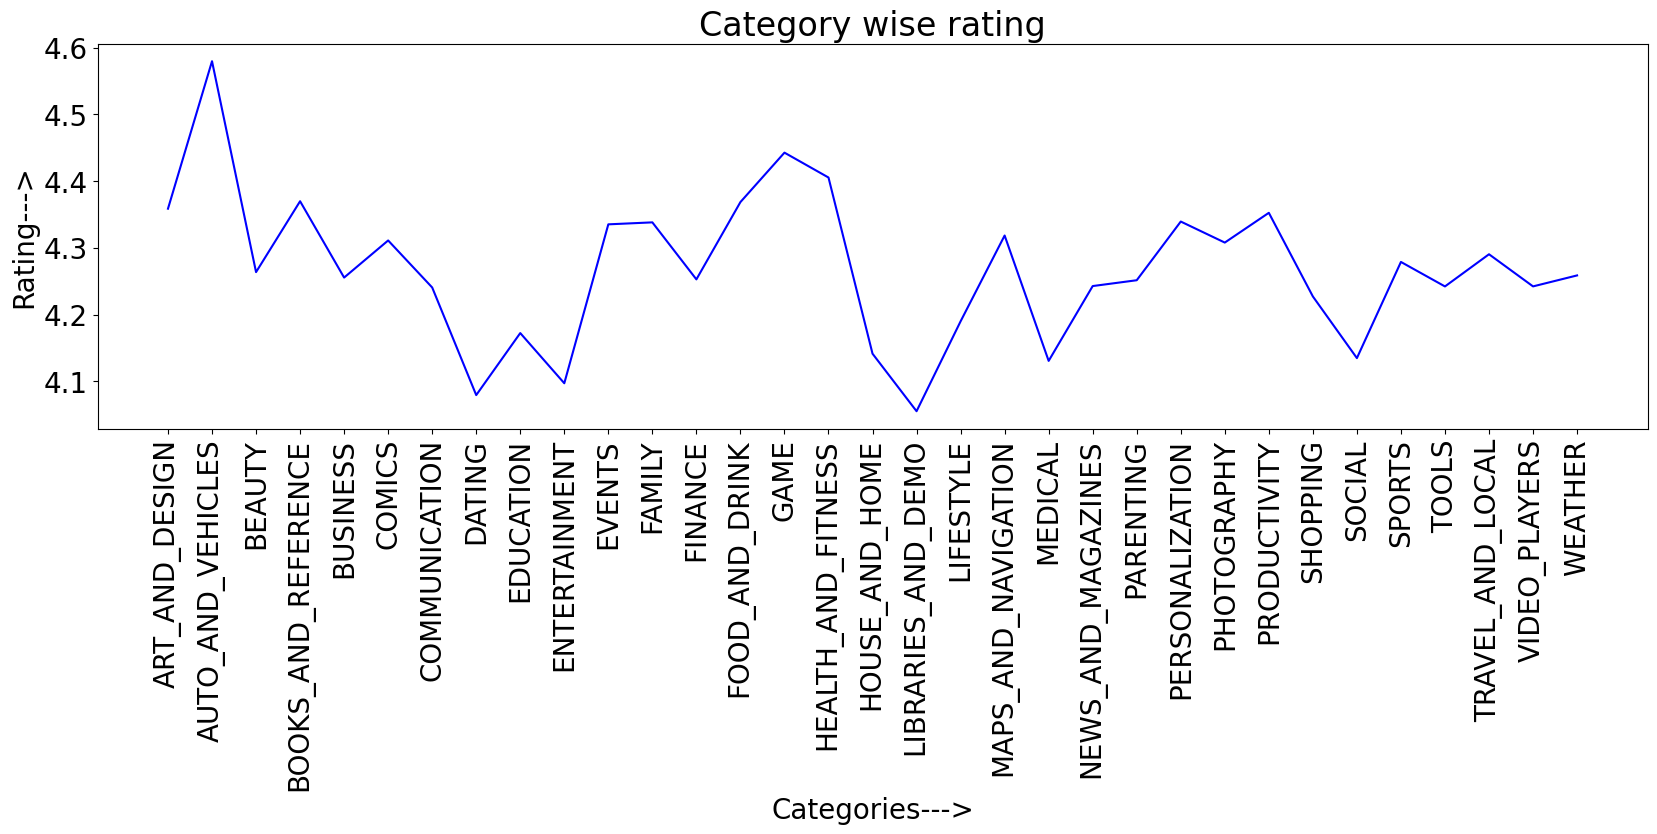

In [368]:
# A line plot of average rating of each category of App

plt.figure(figsize=(20,5))
plt.plot(group_rating,color='b')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Categories--->')
plt.ylabel('Rating--->')
plt.show()

**Findings**

* Rating is highest for AUTO_AND_VEHICLES and GAME category apps.
* Rating is low for LIBRARIES_AND_DEMO  and DATING  category apps

#### **Chart - 5 : Number of Reviews per Category**


<ipython-input-369-e6d0442075e6>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(group_review, 'r--', color = 'g')


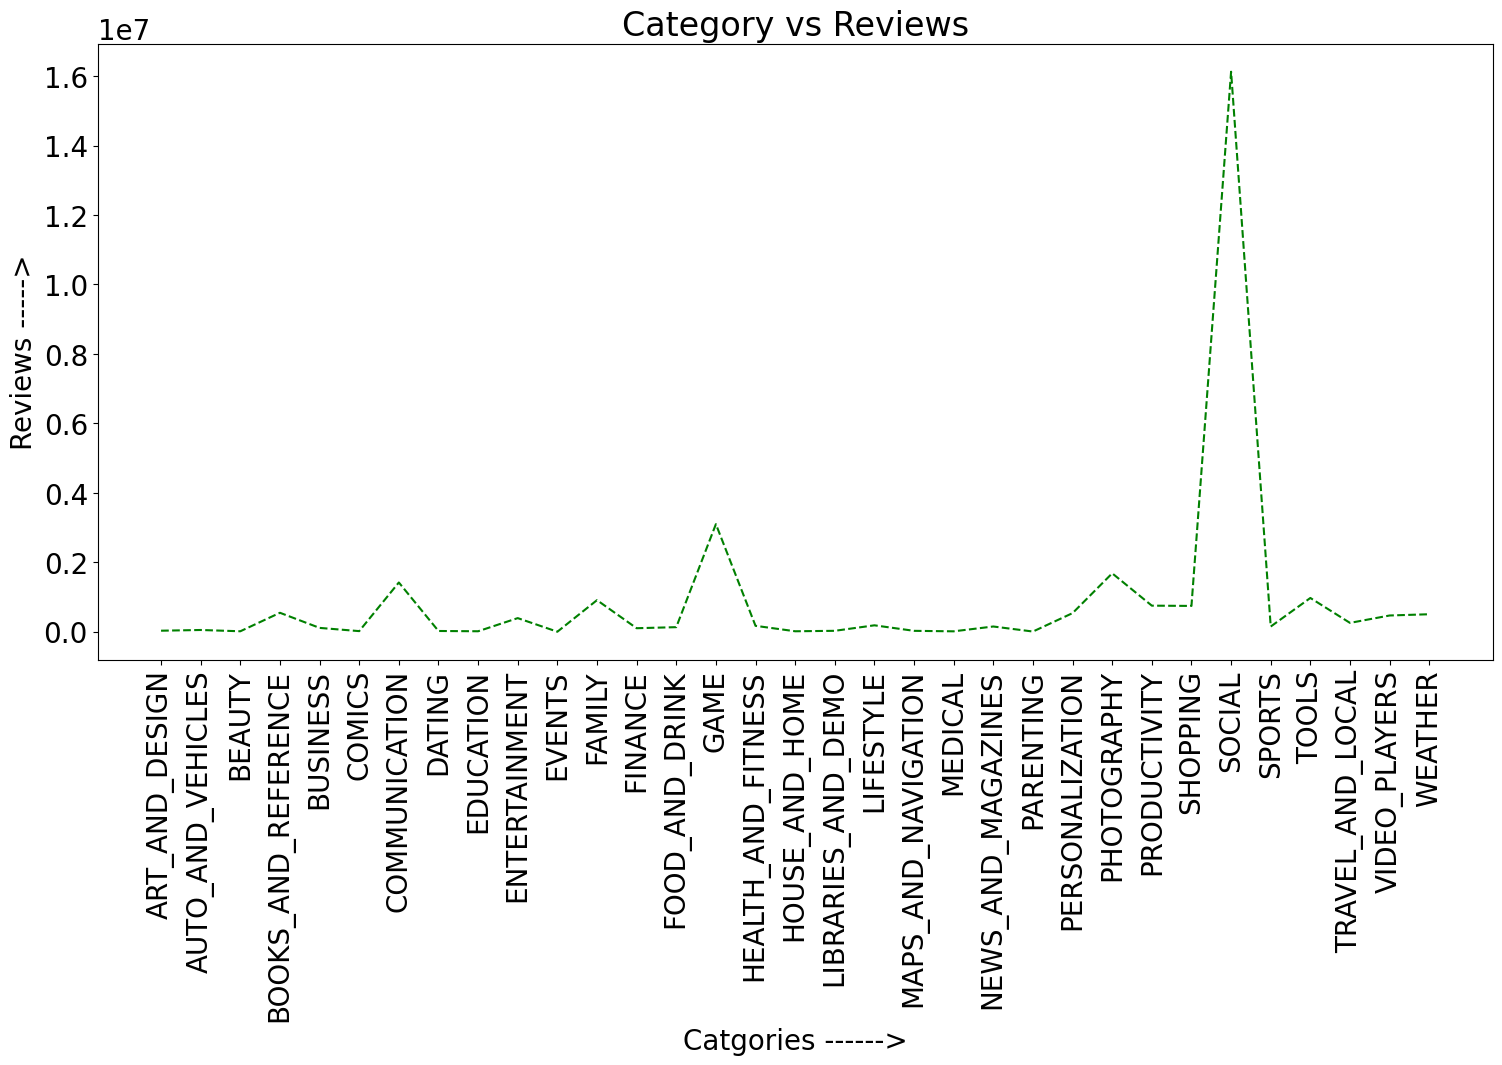

In [369]:

plt.figure(figsize = (18,8))
plt.plot(group_review, 'r--', color = 'g')
plt.xticks(rotation = 90)
plt.title('Category vs Reviews')
plt.xlabel('Catgories ------>')
plt.ylabel('Reviews ----->');

**Findings**

  * Social category has most number of reviews





#### **Chart - 6 : What is the ratio of number of Paid apps and Free apps?**

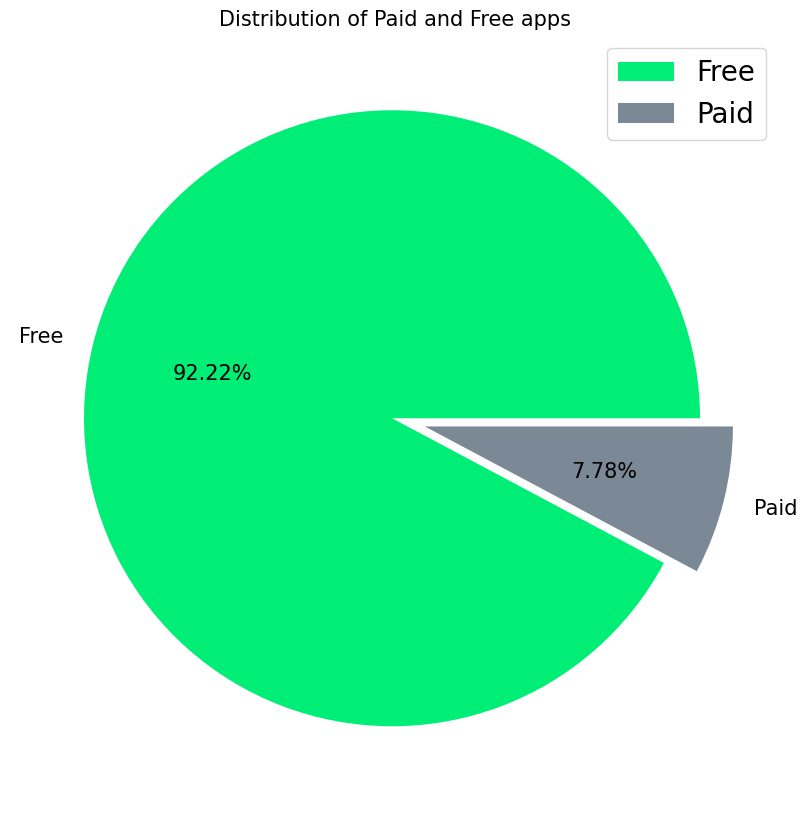

In [370]:
data = df1['Type'].value_counts()
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

**Findings:**

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

#### **Chart - 7 : Which category of Apps from the Content Rating column are found more on playstore ?**

In [371]:
df1['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

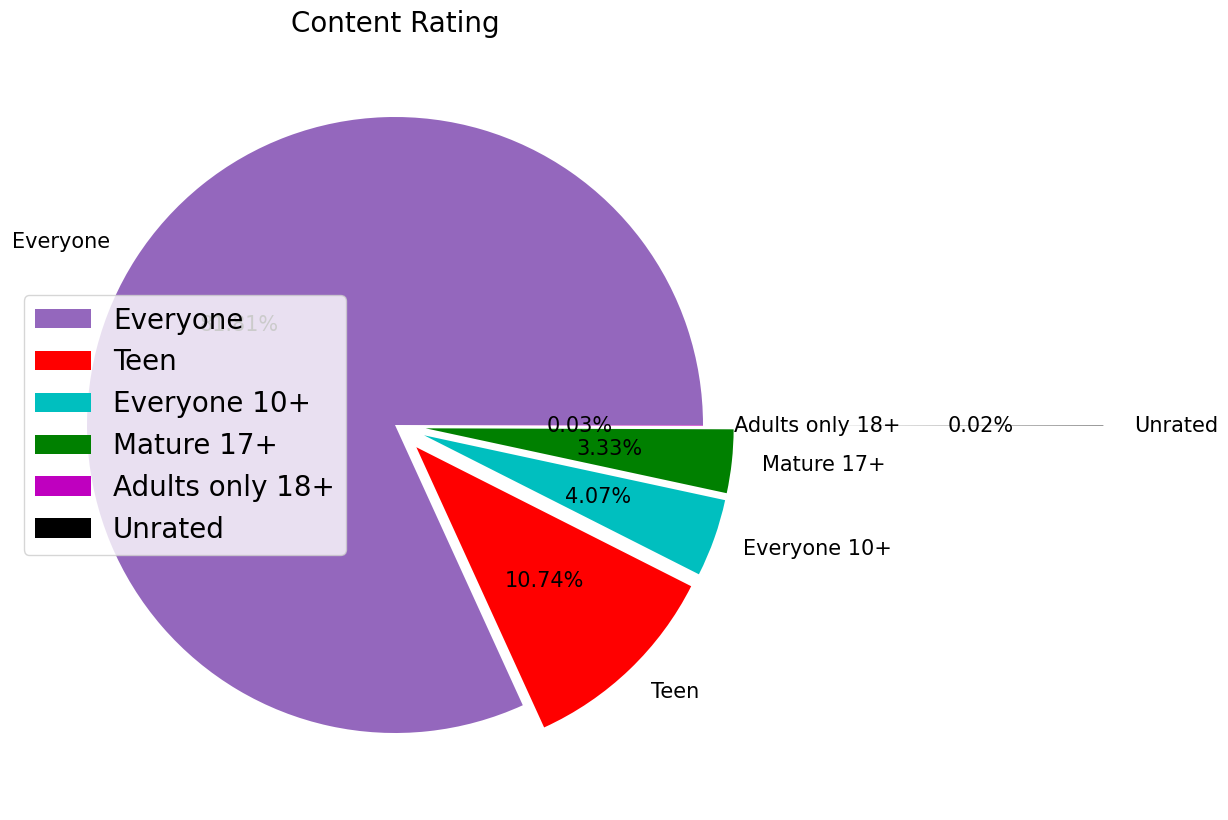

In [372]:
data = df1['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

**Findings**

* From above graph by plotly we can conclude that App Having 'Content Rating' - Everyone is having maximum number installation of 100.228B.
* Also we can conclude that there are 4.29B installation for application having Content Rating of Everyone 10+.
* We can also conclude that there are no such noticible installation for Application having Content Rating of Adults only 18+ and Unrated.

#### **Chart - 8 : What are the Top 10 installed apps in any category?**

In [373]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df1[df1['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

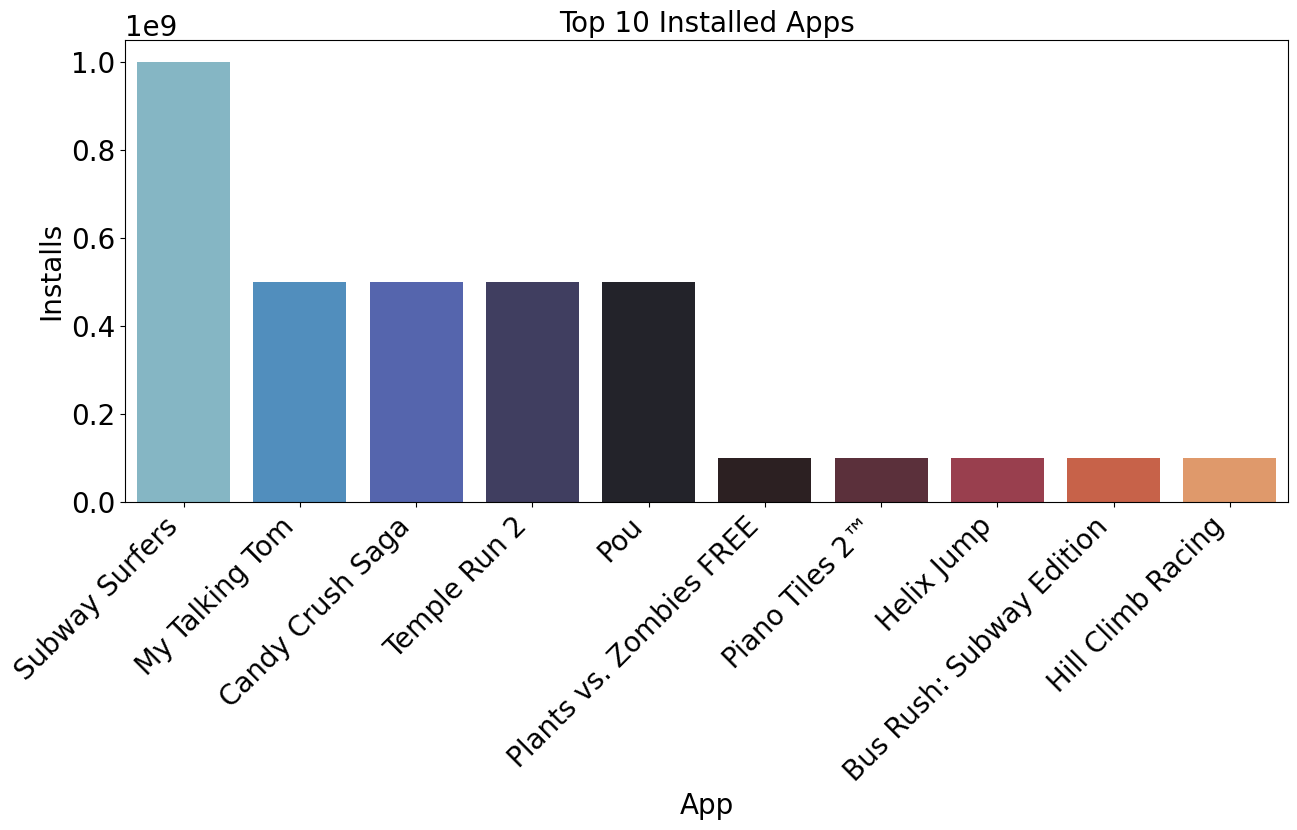

In [374]:
findtop10incategory('GAME')

**Findings:**

From the above graph we can see that in the **`Game category Subway Surfers,Candy Crush Saga, Temple Run 2`** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

#### **Chart - 9 : Distribution of apps based on its size**

In [375]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = df1[df1['Size'] != 'Varies with device']['Size'].max()

min_size = df1[df1['Size'] != 'Varies with device']['Size'].min()

mean_size = round(df1[df1['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = df1[df1['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0, 17.8202, 9.2]

*   The size of an app in our database varies from 100 MB to 0.0083 MB.
We can analyse the size of the apps if we can group them into certain intervals.

*   We have already established that the data in the numeric values in the 'Size' column are skewed towards the left.
*   Lets group the data in the size column as follows into intervals of 10 each:

(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

##### Lets create a function to create the size intervals

In [376]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

Lets apply the size_group function on the Size column and store the results in a new column named Size group.

In [377]:
df1['size_group']=df1['Size'].apply(lambda x : size_apps(x))
df1.head()

App       Category  Rating  Reviews  \
8884  "i DT" Fútbol. Todos Somos Técnicos.         SPORTS     4.3       27   
8532         +Download 4 Instagram Twitter         SOCIAL     4.5    40467   
324             - Free Comics - Comic Apps         COMICS     3.5      115   
4541                                    .R          TOOLS     4.5      259   
4636                                /u/app  COMMUNICATION     4.7      573   

         Size  Installs  Type  Price Content Rating         Genres  \
8884   3.6000       500  Free    0.0       Everyone         Sports   
8532  22.0000   1000000  Free    0.0       Everyone         Social   
324    9.1000     10000  Free    0.0     Mature 17+         Comics   
4541   0.1982     10000  Free    0.0       Everyone          Tools   
4636  53.0000     10000  Free    0.0     Mature 17+  Communication   

     Last Updated Current Ver Android Ver   Rating_group size_group  
8884   2017-10-07        0.22  4.1 and up      Top rated       1-10  
8532   2018-08-02        5.03  4.1 and up      Top rated      20-30  
324    2018-07-13      5.0.12  5.0 and up  Above Average       1-10  
4541   2014-09-16      1.1.06  1.5 and up      Top rated    Below 1  
4636   2018-07-03       4.2.4  4.1 and up      Top rated      50-60

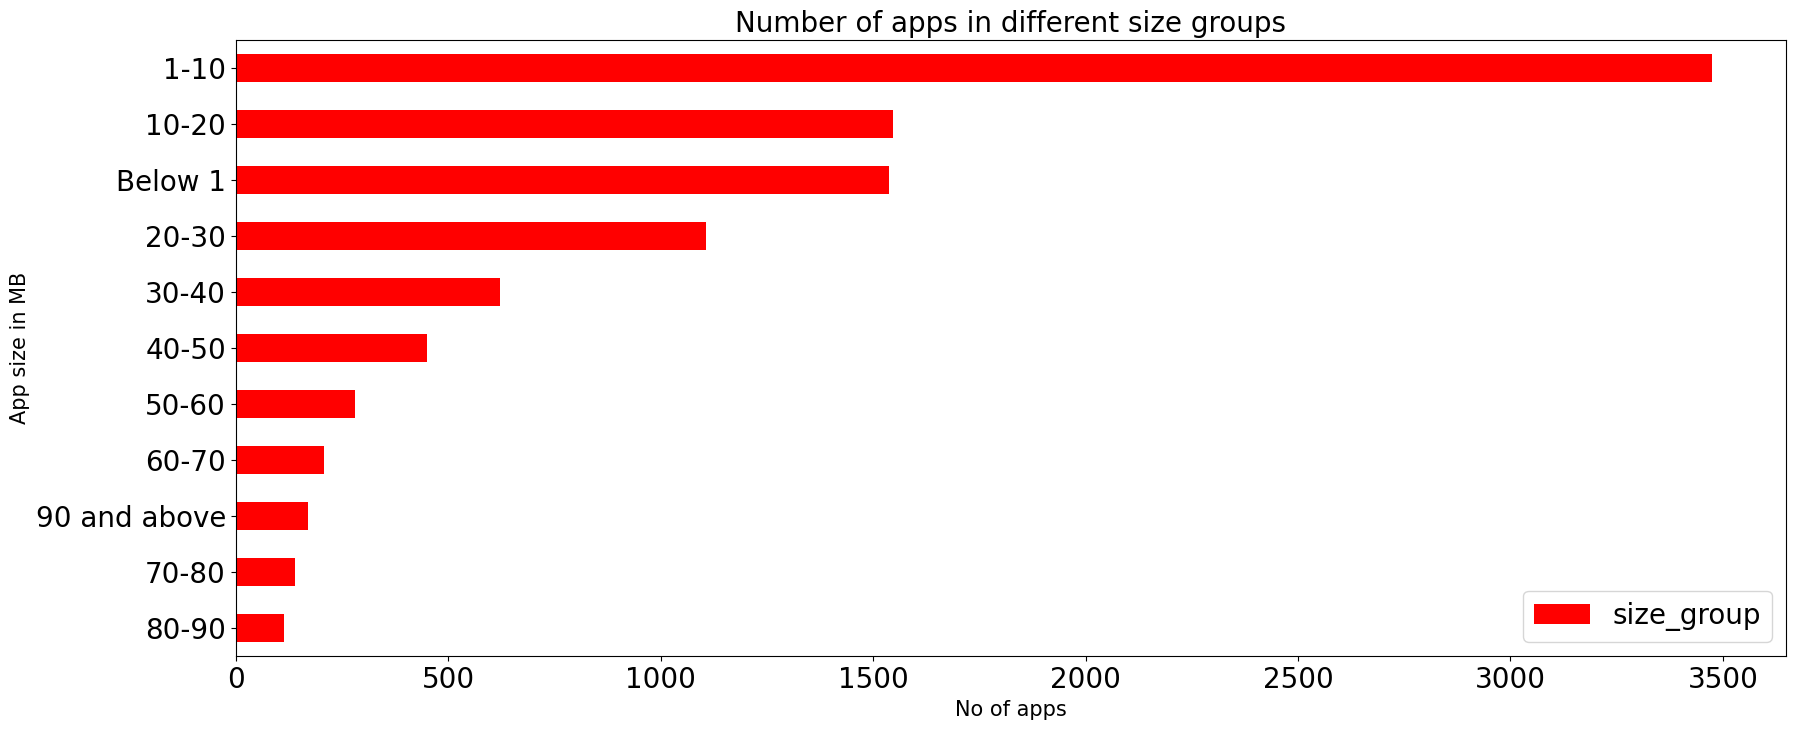

In [378]:
# no of apps belonging to each size group
df1['size_group'].value_counts().plot.barh(figsize=(20,8),color='r').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

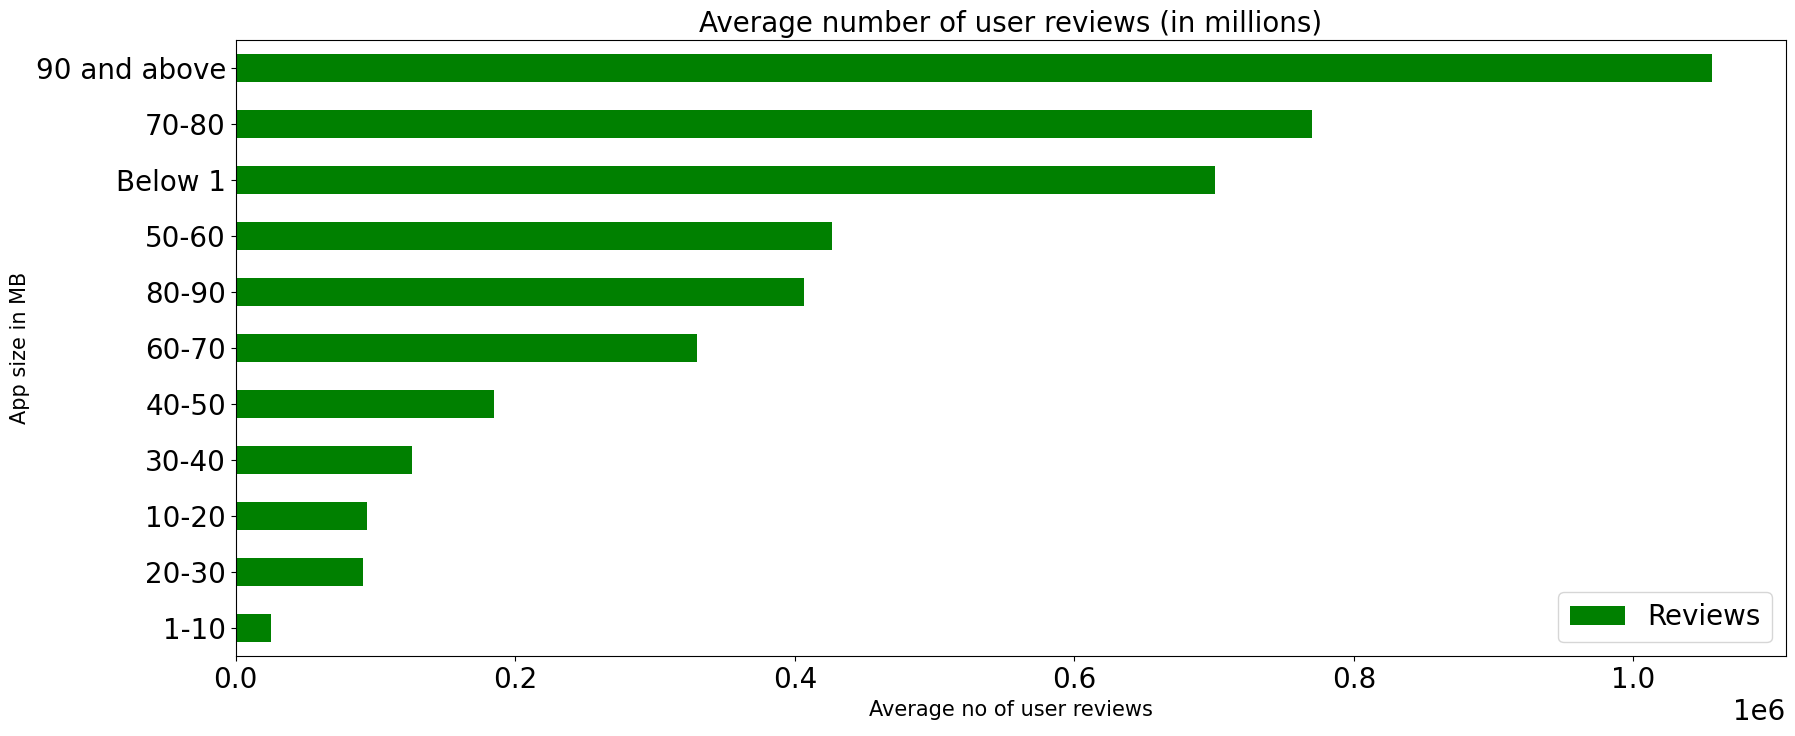

In [379]:
# average no of user reviews in each size group
df1.groupby('size_group')['Reviews'].mean().sort_values().plot.barh(figsize=(20,8), color = 'green')
plt.title("Average number of user reviews (in millions)", size=20)
plt.xlabel('Average no of user reviews', size=15)
plt.ylabel('App size in MB', size=15)
plt.legend()

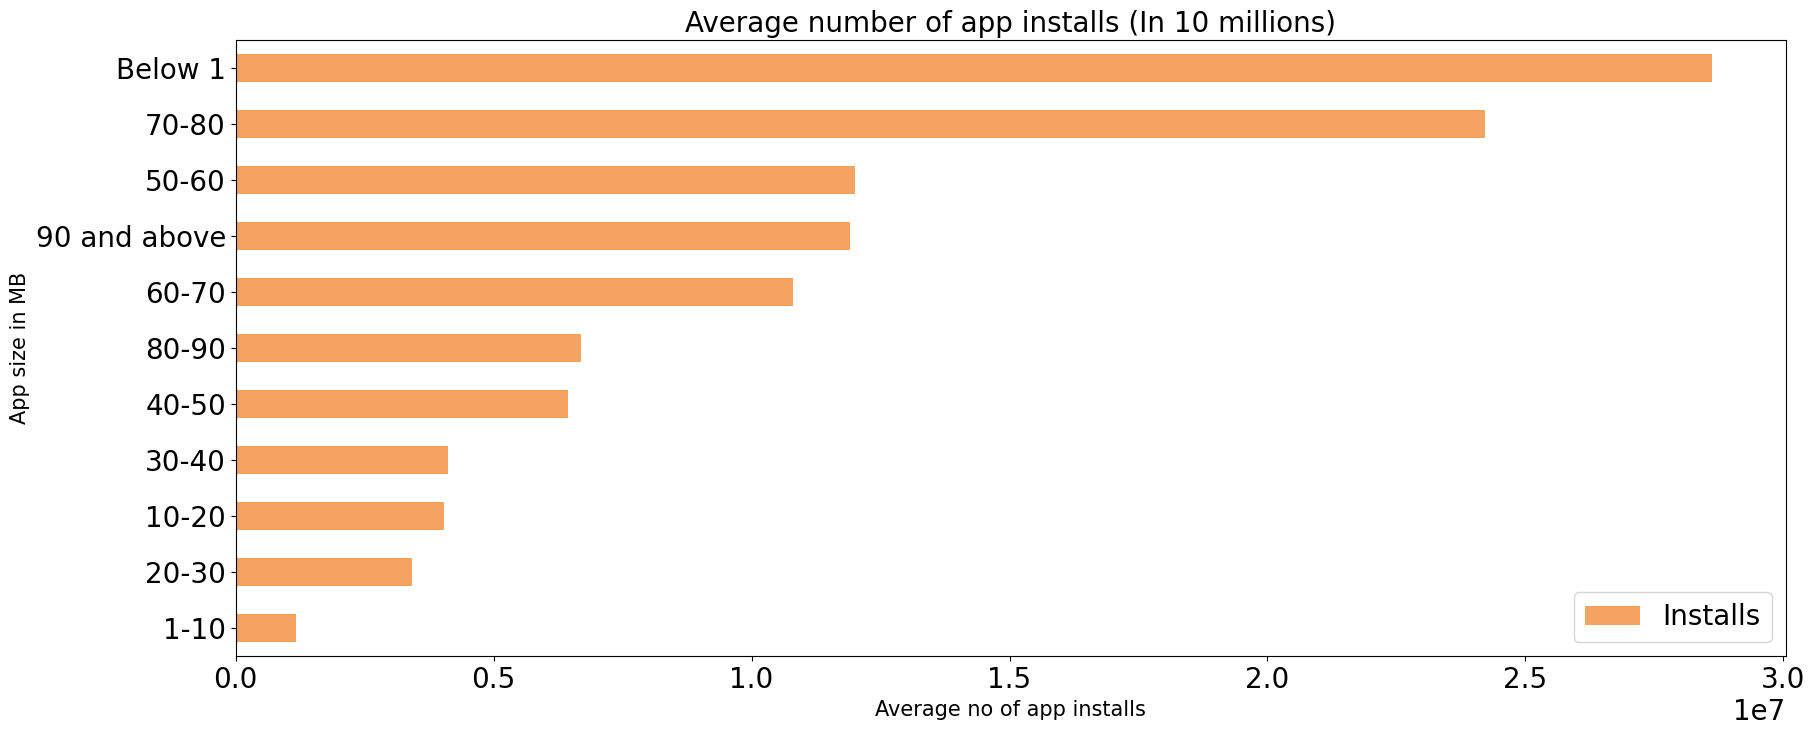

In [380]:
# average number of app installs in each category

df1.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.barh(figsize=(20,8),color='sandybrown').invert_yaxis()
plt.title("Average number of app installs (In 10 millions)", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('Average no of app installs',  size=15)
plt.legend()

*   The sizes of the majority of the apps range in between 1 and 20 MB.
*   There are a good number of apps whose size varies with the device.

*   The apps which are smaller in size on average have lower no of app installs and user reviews.

####**Chart - 10 : Top apps that are of free type**

In [381]:
 # Creating a df for only free apps
free_df = df1[df1['Type'] == 'Free']

In [382]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

App             Category  Rating   Reviews  \
2544                      Facebook               SOCIAL     4.1  78158306   
451                          Gmail        COMMUNICATION     4.3   4604483   
3234                        Google                TOOLS     4.4   8033493   
411   Google Chrome: Fast & Secure        COMMUNICATION     4.3   9643041   
3523                  Google Drive         PRODUCTIVITY     4.4   2731211   
9844                   Google News   NEWS_AND_MAGAZINES     3.9    878065   
2884                 Google Photos          PHOTOGRAPHY     4.5  10859051   
152              Google Play Books  BOOKS_AND_REFERENCE     3.9   1433233   
5856             Google Play Games               FAMILY     4.3   7168735   
3687       Google Play Movies & TV        VIDEO_PLAYERS     3.7    906384   

      Size    Installs  Type  Price Content Rating                   Genres  \
2544   0.0  1000000000  Free    0.0           Teen                   Social   
451    0.0  1000000000  Free    0.0       Everyone            Communication   
3234   0.0  1000000000  Free    0.0       Everyone                    Tools   
411    0.0  1000000000  Free    0.0       Everyone            Communication   
3523   0.0  1000000000  Free    0.0       Everyone             Productivity   
9844  13.0  1000000000  Free    0.0           Teen         News & Magazines   
2884   0.0  1000000000  Free    0.0       Everyone              Photography   
152    0.0  1000000000  Free    0.0           Teen        Books & Reference   
5856   0.0  1000000000  Free    0.0           Teen            Entertainment   
3687   0.0  1000000000  Free    0.0           Teen  Video Players & Editors   

     Last Updated         Current Ver         Android Ver   Rating_group  \
2544   2018-08-03  Varies with device  Varies with device      Top rated   
451    2018-08-02  Varies with device  Varies with device      Top rated   
3234   2018-08-03  Varies with device  Varies with device      Top rated   
411    2018-08-01  Varies with device  Varies with device      Top rated   
3523   2018-08-06  Varies with device  Varies with device      Top rated   
9844   2018-08-01               5.2.0          4.4 and up  Above Average   
2884   2018-08-06  Varies with device  Varies with device      Top rated   
152    2018-08-03  Varies with device  Varies with device  Above Average   
5856   2018-07-16  Varies with device  Varies with device      Top rated   
3687   2018-08-06  Varies with device  Varies with device  Above Average   

     size_group  
2544    Below 1  
451     Below 1  
3234    Below 1  
411     Below 1  
3523    Below 1  
9844      10-20  
2884    Below 1  
152     Below 1  
5856    Below 1  
3687    Below 1

In [383]:
# Top free apps

top_free_df['App']

2544                                    Facebook
451                                        Gmail
3234                                      Google
411                 Google Chrome: Fast & Secure
3523                                Google Drive
9844                                 Google News
2884                               Google Photos
152                            Google Play Books
5856                           Google Play Games
3687                     Google Play Movies & TV
3232                          Google Street View
2554                                     Google+
464                                     Hangouts
2604                                   Instagram
3223                   Maps - Navigate & Explore
382     Messenger – Text and Video Chat for Free
391                Skype - free IM & video calls
1872                              Subway Surfers
336                           WhatsApp Messenger
3665                                     YouTube
Name: App, dtype: ob

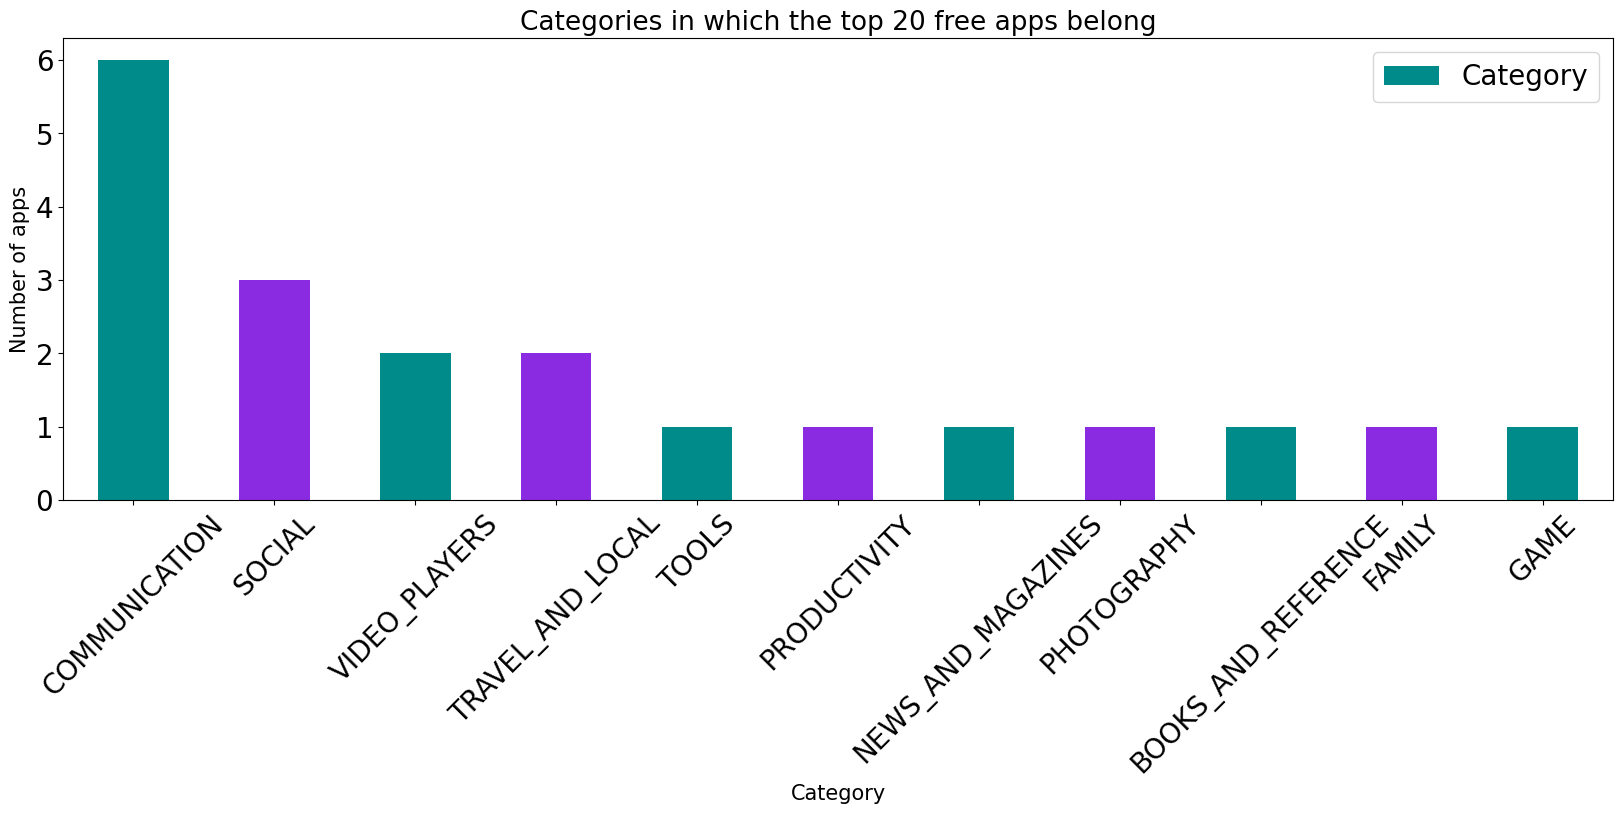

In [384]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

#### **Chart - 11 : Top apps that are of paid type.**

In [385]:
# Creating a df containing only paid apps
paid_df=df1[df1['Type']=='Paid']

<Axes: xlabel='Price'>

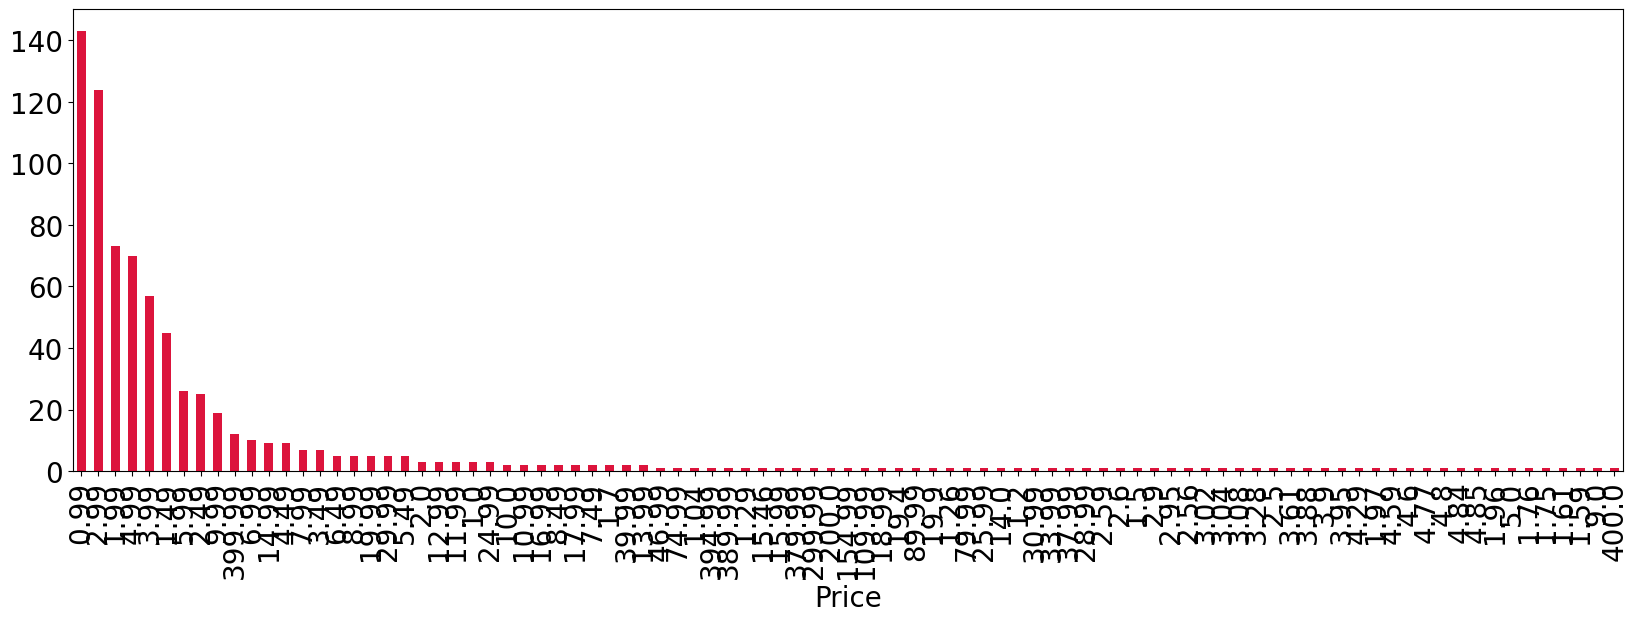

In [386]:
# Number of apps that can be installed at a particular price

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.





#### Chart - 12 : Android version based on each category

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [387]:
df1['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df1['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df1['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df1['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df1['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df1['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df1['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df1['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df1['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df1['Android Ver'].fillna('1.0', inplace=True)

In [388]:
print(df1.groupby('Category')['Android Ver'].value_counts())


Category        Android Ver
ART_AND_DESIGN  4.0            47
                2.0             9
                3.0             2
                1.0             1
                5.0             1
                               ..
WEATHER         4.0            38
                1.0            23
                2.0            10
                5.0             7
                3.0             1
Name: Android Ver, Length: 199, dtype: int64


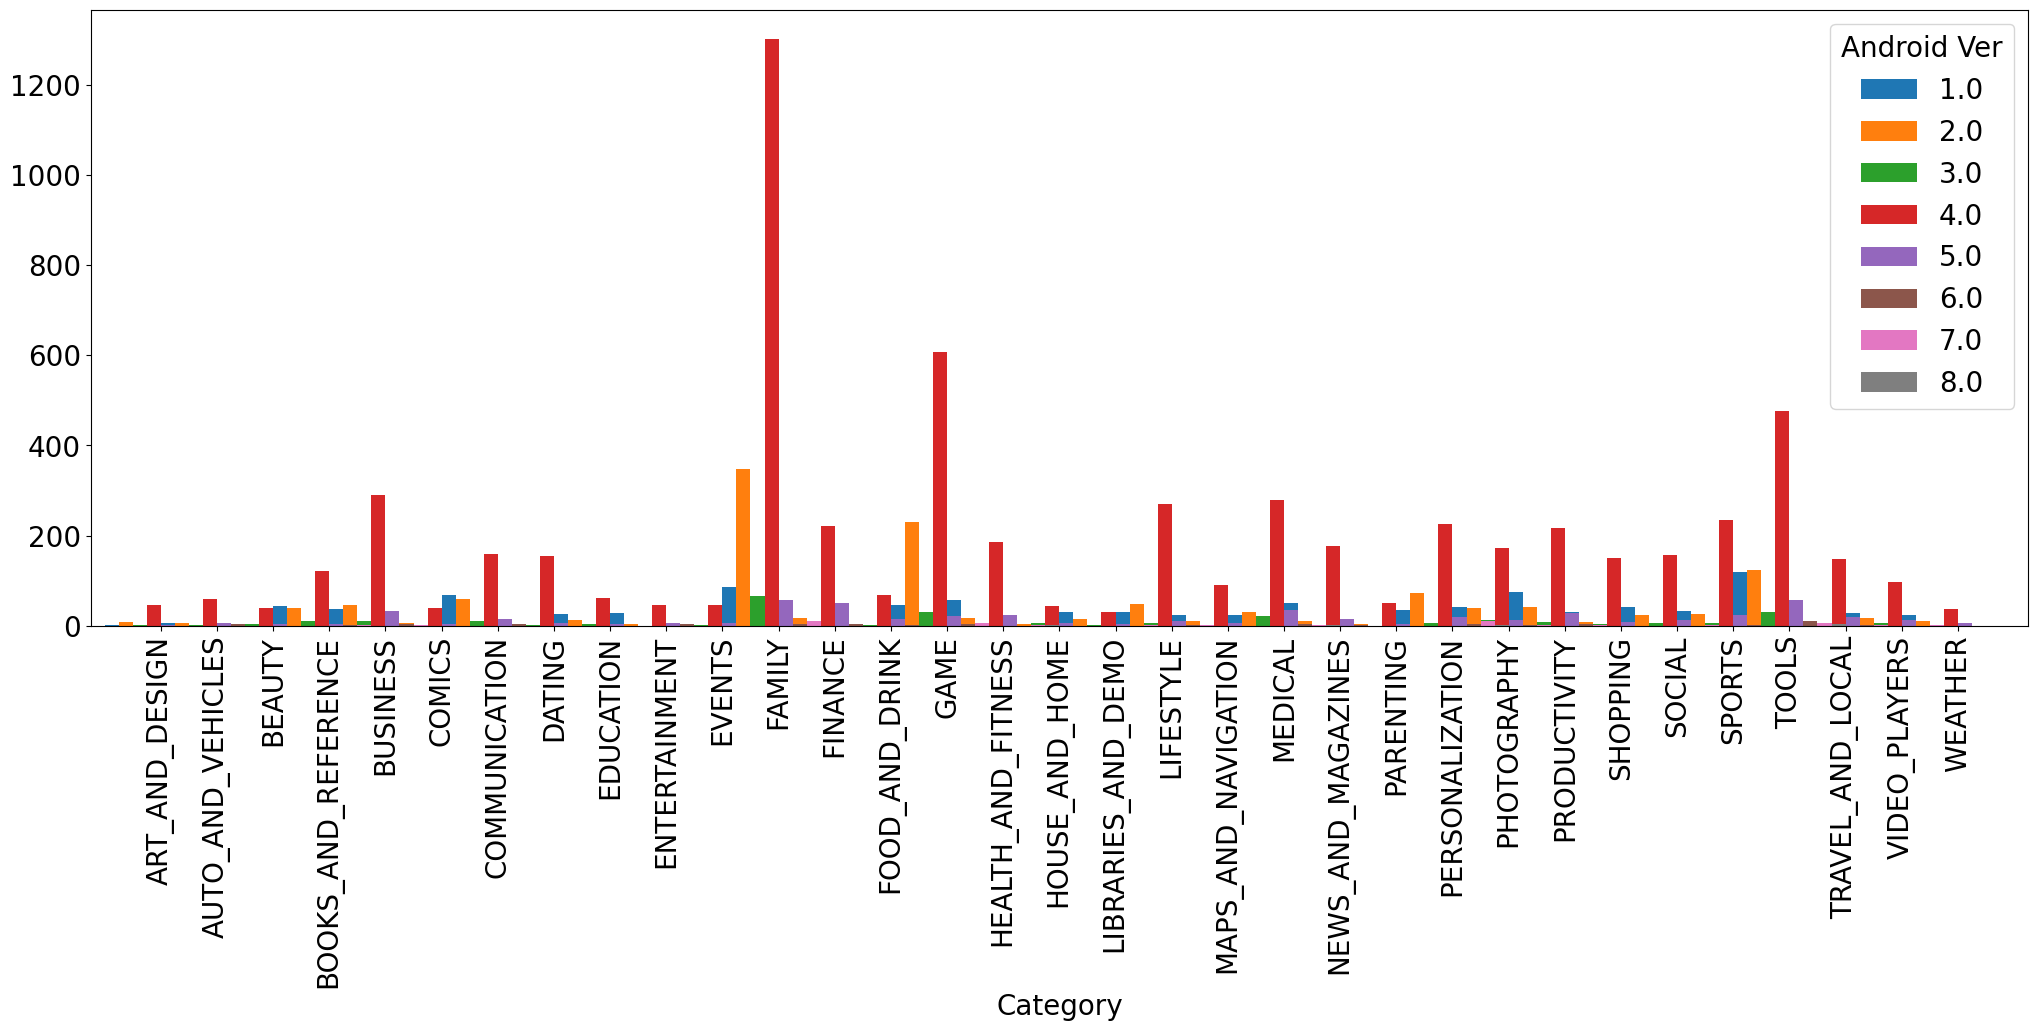

In [389]:
Type_cat = df1.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

**Findings:**

It is clearly evident from the above plot that majority of the apps are working on **`Android_Ver 4.0 and up`**.

 #### **Chart - 13: Most Revenue Generating Apps**

In [390]:
# Creating revenue_df and then creating a revenue column in the revenue_df

revenue_df = df1[df1.Type == 'Paid'][['App','Installs','Price']]
revenue_df['Revenue'] = revenue_df['Installs'] * revenue_df['Price']
sorted_revenue_df = revenue_df.sort_values('Revenue',ascending=False).head(10)
sorted_revenue_df

App  Installs   Price     Revenue
2241                      Minecraft  10000000    6.99  69900000.0
5351                      I am rich    100000  399.99  39999000.0
5356              I Am Rich Premium     50000  399.99  19999500.0
4034                  Hitman Sniper  10000000    0.99   9900000.0
7417  Grand Theft Auto: San Andreas   1000000    6.99   6990000.0
5578        Sleep as Android Unlock   1000000    5.99   5990000.0
2883            Facetune - For Free   1000000    5.99   5990000.0
8804            DraStic DS Emulator   1000000    4.99   4990000.0
4367       I'm Rich - Trump Edition     10000  400.00   4000000.0
4362                     💎 I'm rich     10000  399.99   3999900.0

This Revenue column can be used to find the most revenue generating apps

Text(0, 0.5, 'Revenue')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


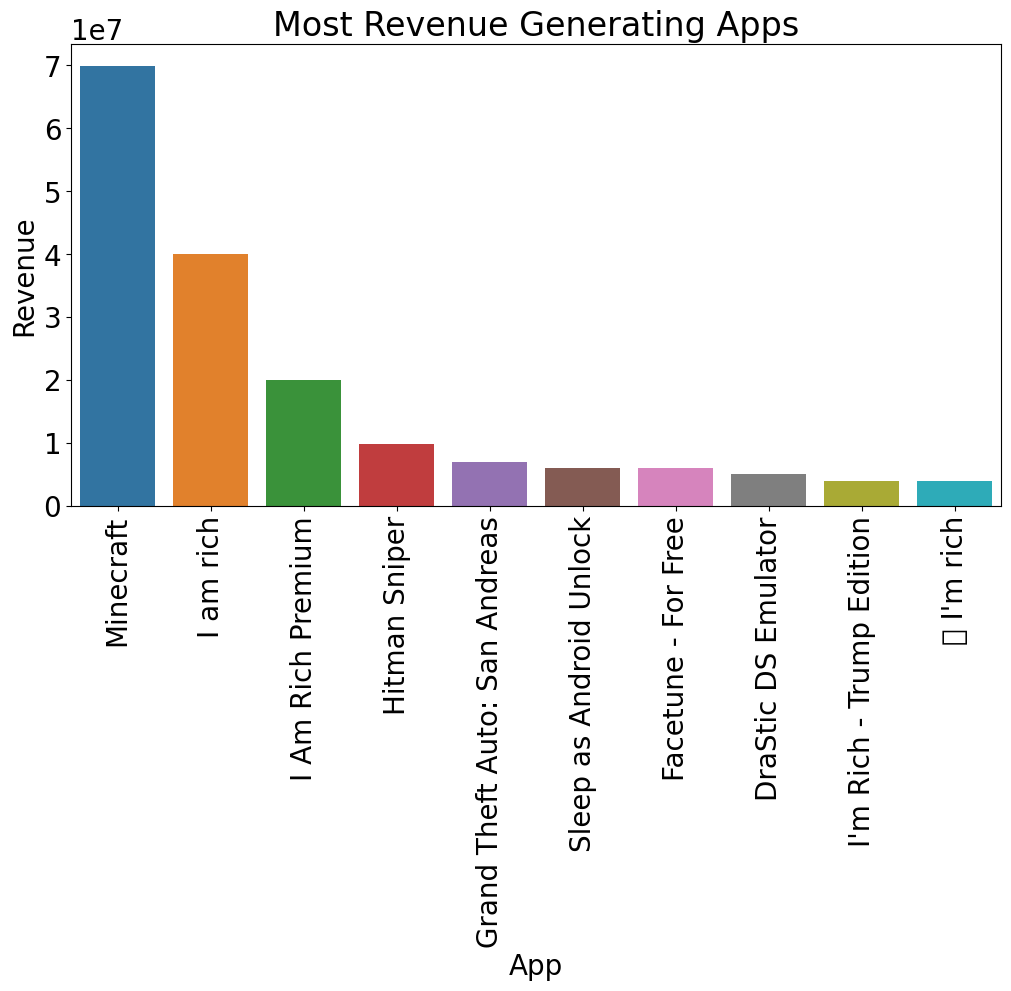

In [391]:
# Apps that generate the most revenue
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sorted_revenue_df.App,y=sorted_revenue_df.Revenue,ax=ax)
plt.xticks(rotation=90)
plt.title('Most Revenue Generating Apps')
plt.xlabel('App')
plt.ylabel('Revenue')

This visualization tells us that Minecraft generates the most revenue i.e approximately 70 million dollars.

  #### **Chart - 14 : Top Genres based on Installs**

In [392]:
# Creating dataframe that has genres with the most installs

genres_and_installs = df1.groupby('Genres')[['Installs']].sum().sort_values('Installs',ascending=False).head(10)

'genres_and_install' can be used to find the genres with the most number of installs.

Text(0, 0.5, 'Total Installs')

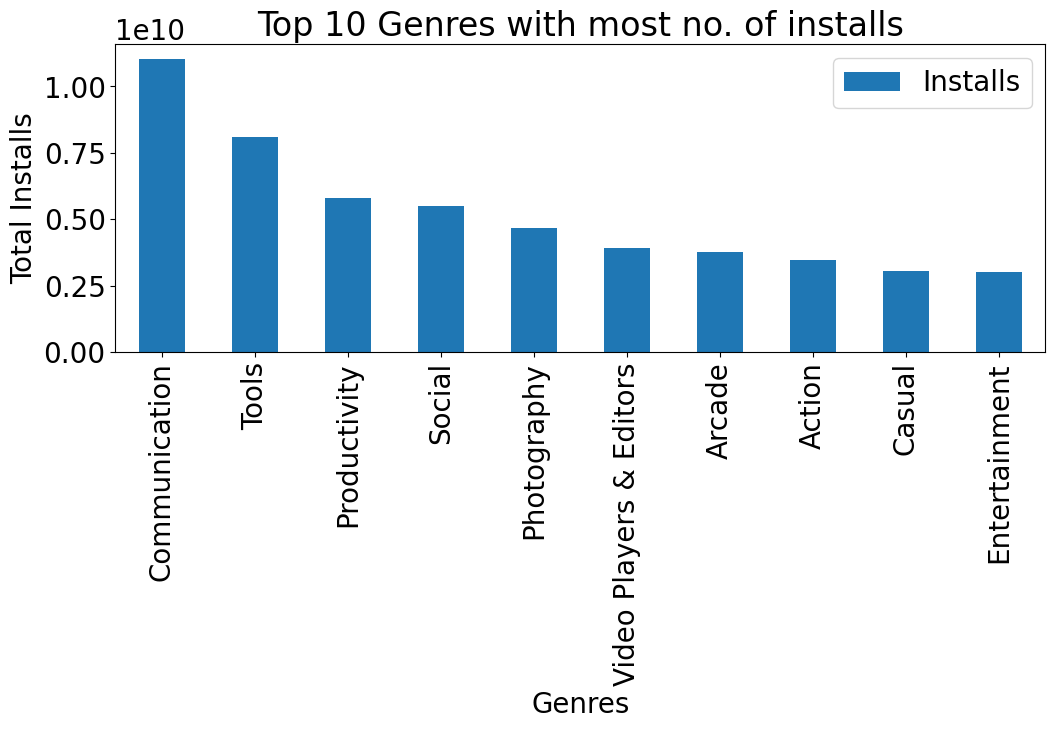

In [393]:
# Top genres based on their total installs
fig, ax = plt.subplots(figsize=(12, 4))
genres_and_installs.plot(kind='bar',ax=ax)
plt.title('Top 10 Genres with most no. of installs')
plt.xlabel('Genres')
plt.ylabel('Total Installs')

By looking at the visualization we can say that Communication genre has the most number of installs. With that we can also say that apps from this genre are downloaded more than the other genres.

So, this marks the end of the visualizations for the Apps Dataframe and now we will begin with the visualizations for the Reviews Dataframe.

#### **Chart - 15: Percentage of Review Sentiments**

In [394]:
# Basic inspection
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

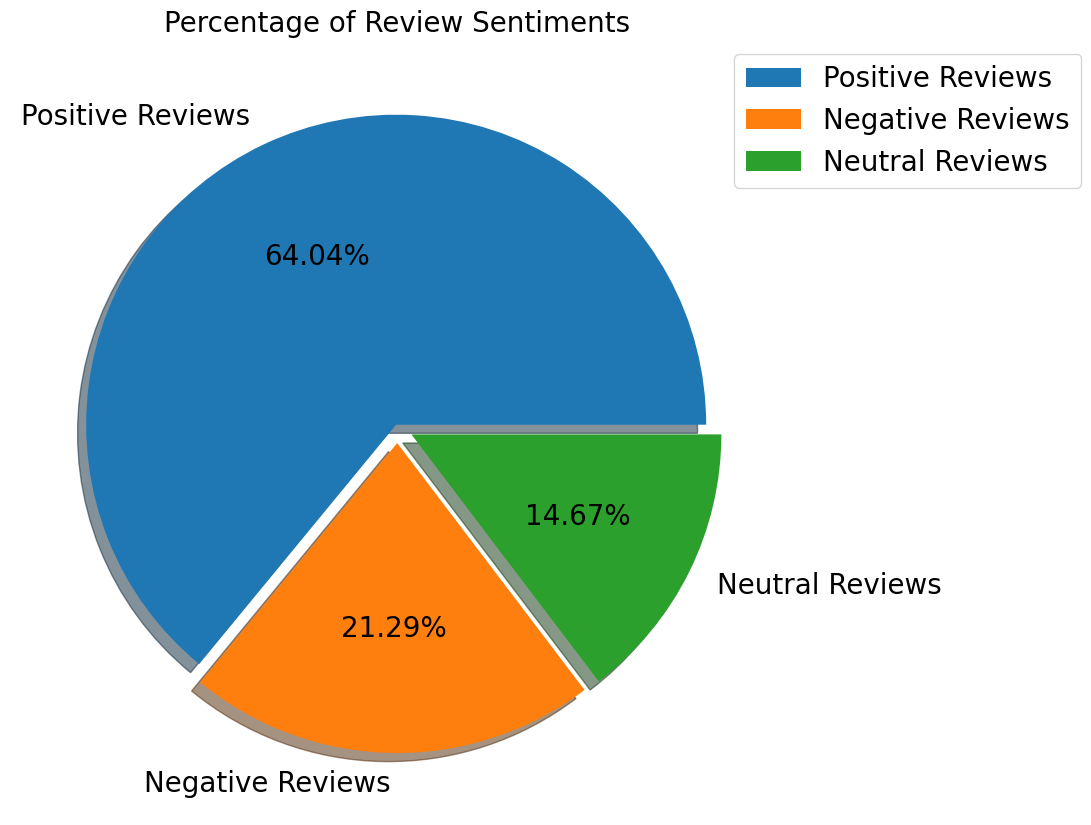

In [395]:
import matplotlib
counts = list(df2['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**Findings:**

1. Positive reviews are **64.30%**
2. Negative reviews are **22.80%**
3. Neutral reviews are **12.90%**

#### **Chart - 16 : Apps with the highest number of positive reviews**

In [396]:
# positive reviews
positive_ur_df=df2[df2['Sentiment']=='Positive']
positive_ur_df

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
2               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
...                               ...   
29683  Housing-Real Estate & Property   
29686  Housing-Real Estate & Property   
29687  Housing-Real Estate & Property   
29688  Housing-Real Estate & Property   
29690  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2             Works great especially going grocery store  Positive   
3                                           Best idea us  Positive   
4                                               Best way  Positive   
...                                                  ...       ...   
29683  I able set range 1cr, scroll space 0-1cr range...  Positive   
29686  Everything old stuff neither clear sold proper...  Positive   
29687  Most ads older many agents ..not much owner po...  Positive   
29688  If photos posted portal load, fit purpose. I'm...  Positive   
29690  I property business got link SMS happy perform...  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
2                0.400000                0.875000  
3                1.000000                0.300000  
4                1.000000                0.300000  
...                   ...                     ...  
29683            0.233333                0.550000  
29686            0.021591                0.259470  
29687            0.173333                0.486667  
29688            0.225000                0.447222  
29690            0.800000                1.000000  

[19015 rows x 5 columns]

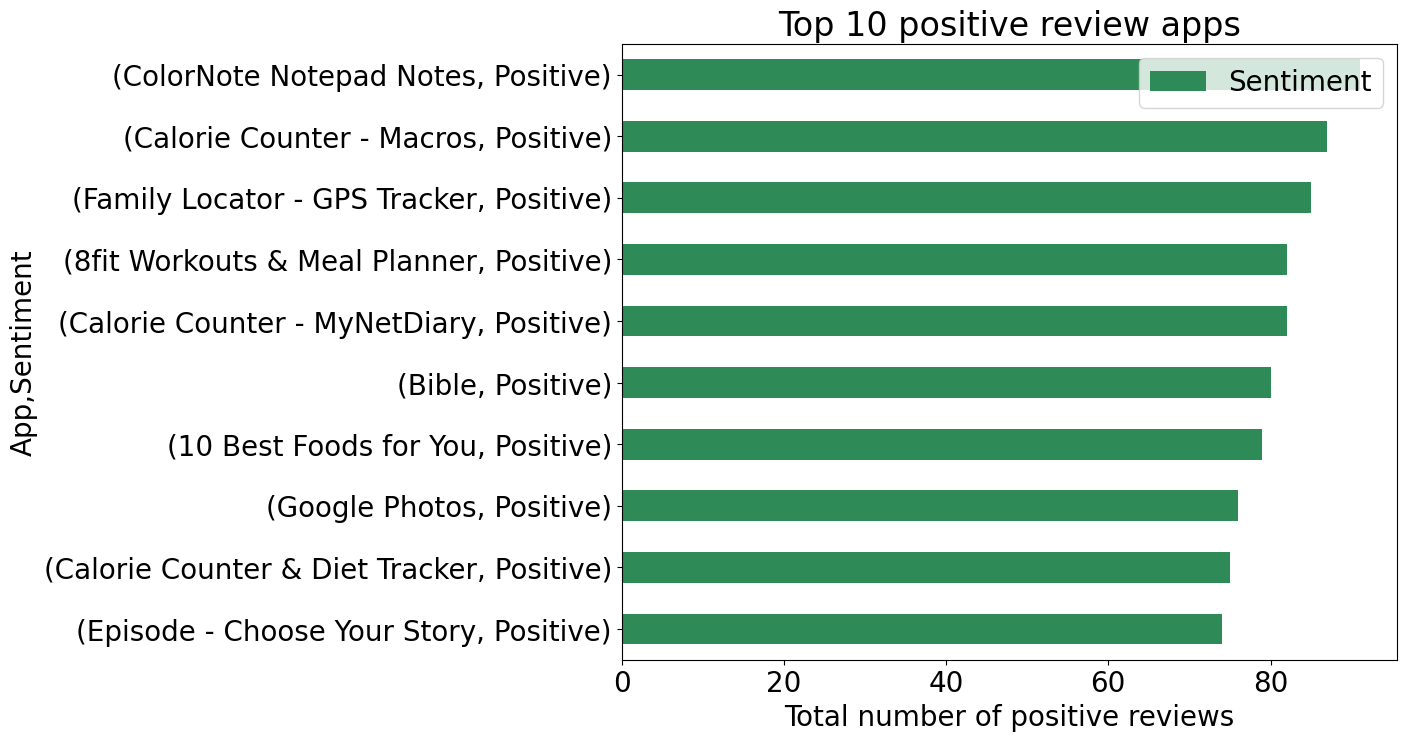

In [397]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

#### **Chart - 17 : Apps with the highest number of negative reviews.**

In [398]:
negative_ur_df=df2[df2['Sentiment']=='Negative']
negative_ur_df

App  \
29              10 Best Foods for You   
40              10 Best Foods for You   
65              10 Best Foods for You   
80              10 Best Foods for You   
90              10 Best Foods for You   
...                               ...   
29681  Housing-Real Estate & Property   
29682  Housing-Real Estate & Property   
29685  Housing-Real Estate & Property   
29689  Housing-Real Estate & Property   
29691  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
29                    No recipe book Unable recipe book.  Negative   
40     Waste time It needs internet time n ask calls ...  Negative   
65                               Faltu plz waste ur time  Negative   
80                                     Crap Doesn't work  Negative   
90     Boring. I thought actually just texts that's i...  Negative   
...                                                  ...       ...   
29681  Horrible app. I wanted list property get aroun...  Negative   
29682  Worst app. We get nothing Time waste . They up...  Negative   
29685  No response support team. After I login, unabl...  Negative   
29689  Dumb app, I wanted post property rent give opt...  Negative   
29691  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
29              -0.500000                0.500000  
40              -0.200000                0.000000  
65              -0.200000                0.000000  
80              -0.800000                0.800000  
90              -0.325000                0.475000  
...                   ...                     ...  
29681           -0.528571                0.717262  
29682           -0.400000                0.250000  
29685           -0.377778                0.533333  
29689           -0.287500                0.250000  
29691           -0.316667                0.400000  

[6321 rows x 5 columns]

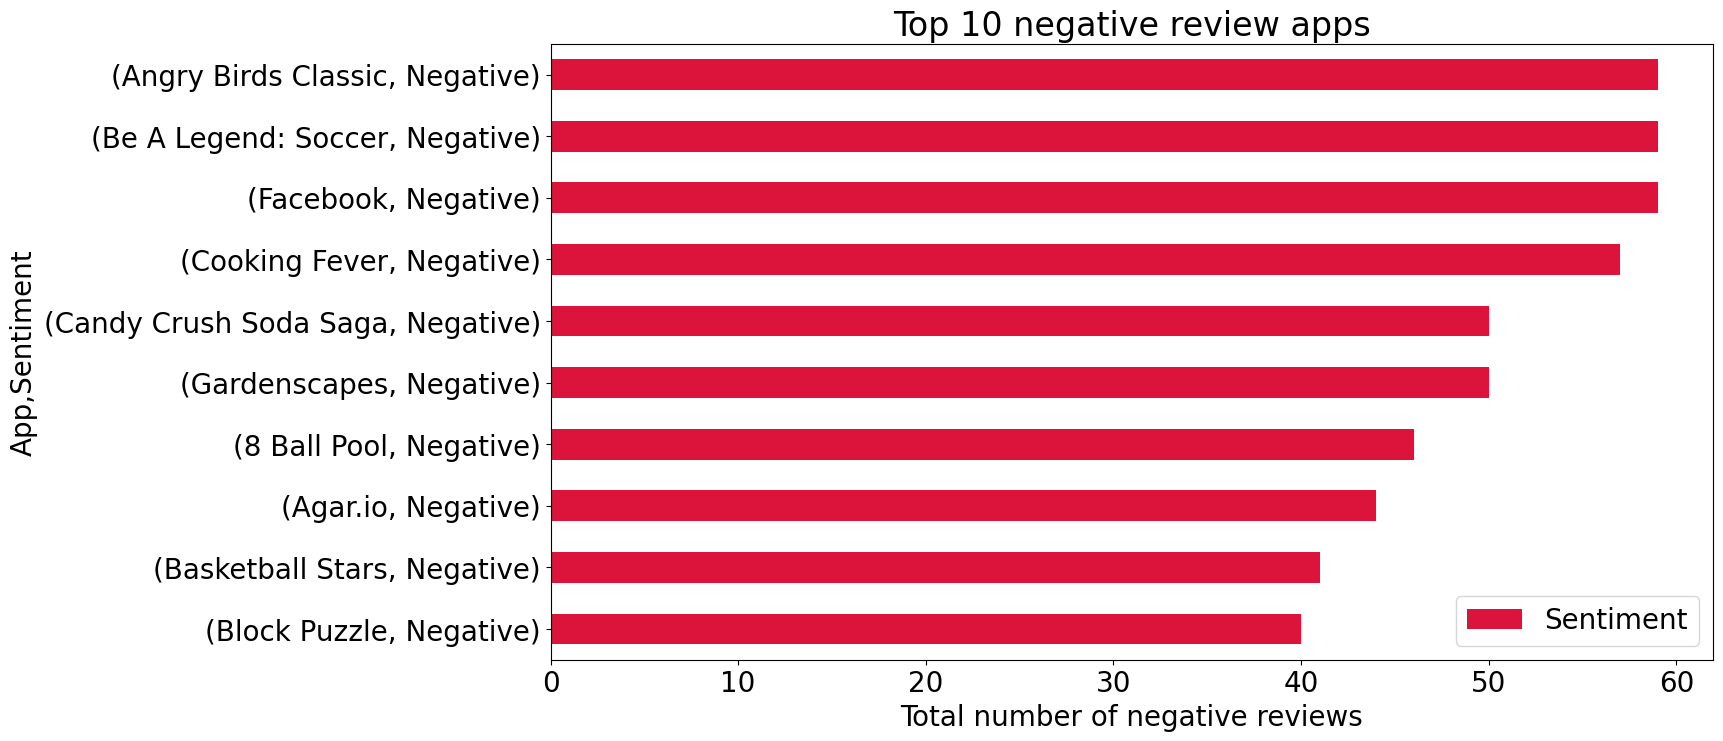

In [399]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

 #### **Chart - 18 : Apps with the highest number of neutral reviews**

In [400]:
# Neutral reviews

neutral_reviews_df = df2[df2['Sentiment'] =='Neutral']
neutral_reviews_df

App  \
6               10 Best Foods for You   
7               10 Best Foods for You   
19              10 Best Foods for You   
22              10 Best Foods for You   
26              10 Best Foods for You   
...                               ...   
29666  Hotwire Hotel & Car Rental App   
29670  Hotwire Hotel & Car Rental App   
29675  Housing-Real Estate & Property   
29677  Housing-Real Estate & Property   
29684  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
6                                   Looking forward app,   Neutral   
7                  It helpful site ! It help foods get !   Neutral   
19                                            God health   Neutral   
22                     I found lot wealth form health...   Neutral   
26                                           On test....   Neutral   
...                                                  ...       ...   
29666         Solid app. No issues yet. Been using year.   Neutral   
29670  Keeps telling there's problem date time, can't...   Neutral   
29675  Why business? Your filters don't work.. redire...   Neutral   
29677   I want list property sale option. Please connect   Neutral   
29684  What nonsensical app.. doesn't owner postings ...   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
6                     0.0                     0.0  
7                     0.0                     0.0  
19                    0.0                     0.0  
22                    0.0                     0.0  
26                    0.0                     0.0  
...                   ...                     ...  
29666                 0.0                     0.1  
29670                 0.0                     0.0  
29675                 0.0                     0.0  
29677                 0.0                     0.0  
29684                 0.0                     0.0  

[4356 rows x 5 columns]

We can use this 'neutral_reviews_df' to plot the highest neutral review apps.

Text(0.5, 1.0, 'Apps with the highest number of neutral reviews')

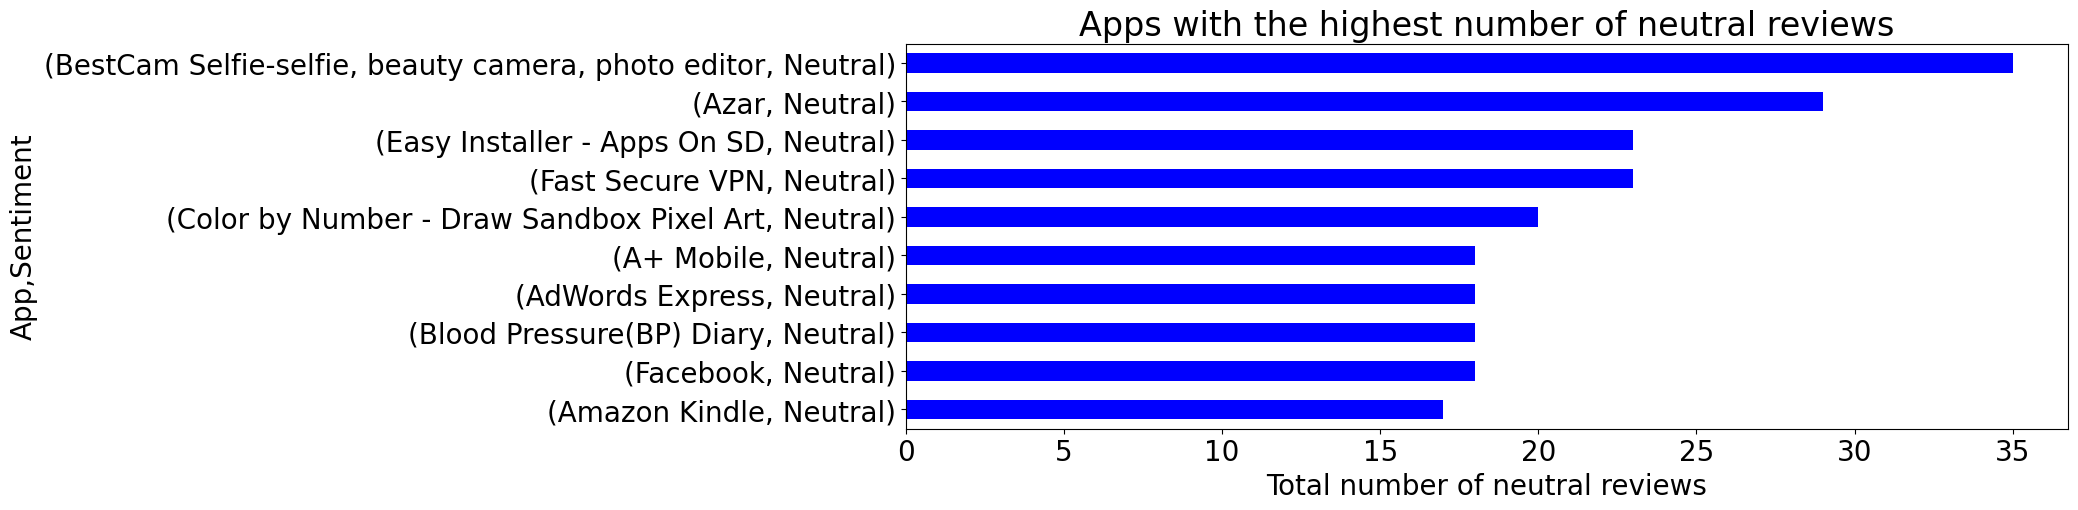

In [401]:
# Bar plot

neutral_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,5), color='b').invert_yaxis()
plt.xlabel('Total number of neutral reviews')
plt.title('Apps with the highest number of neutral reviews')

#### **Chart - 19 : Histogram of Subjectivity**

In [402]:
df.Sentiment_Subjectivity.value_counts()

0.000000    3488
1.000000    1358
0.500000    1282
0.600000     940
0.750000     888
            ... 
0.513434       1
0.508036       1
0.255455       1
0.334375       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4382, dtype: int64

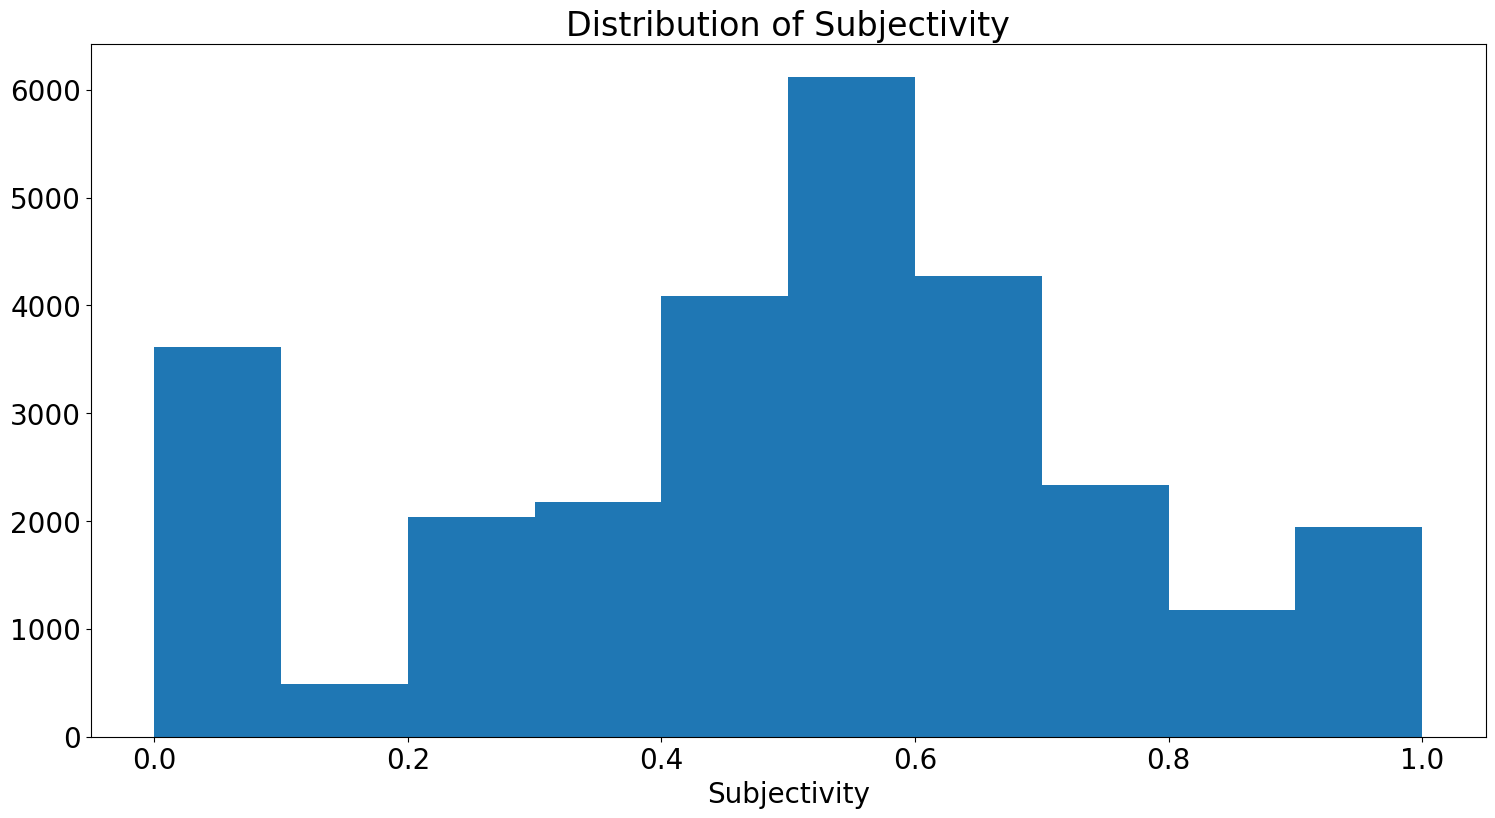

In [403]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df[df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

 **Findings:**

**`0 - objective(fact), 1 - subjective(opinion)`**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

#### **Chart - 20 : How Content Rating affect over the App**



###1) Paid App Content Rating

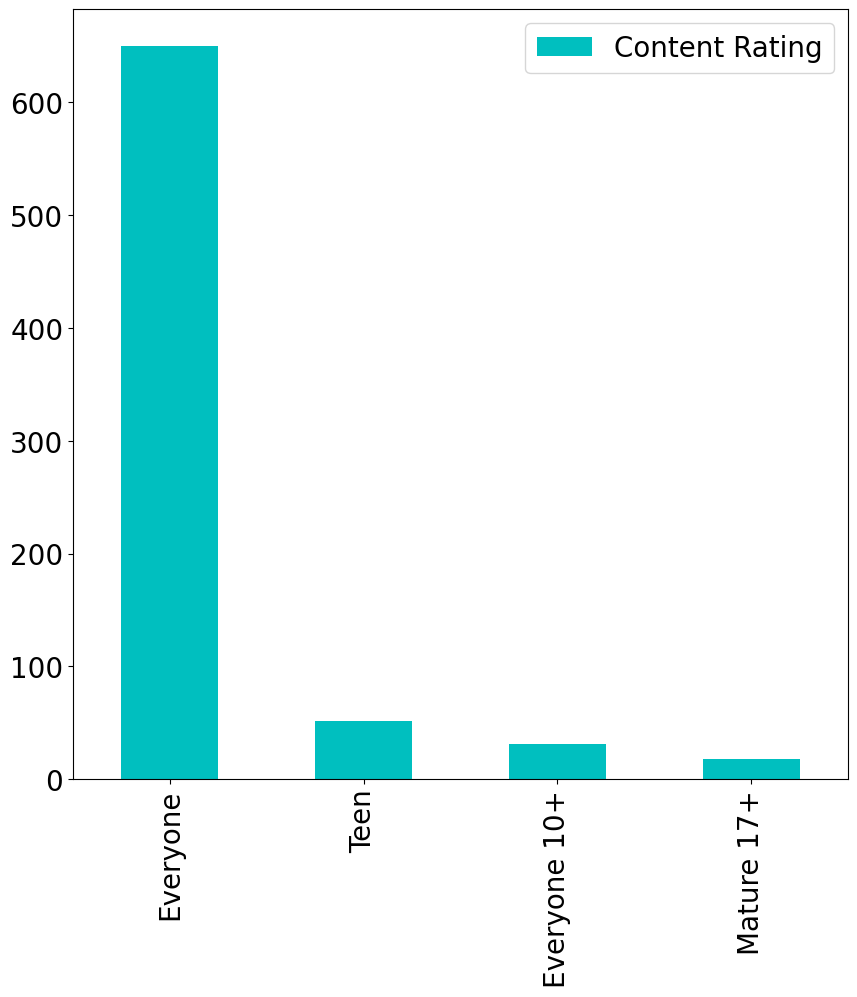

In [404]:
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

###2) Free App content Rating

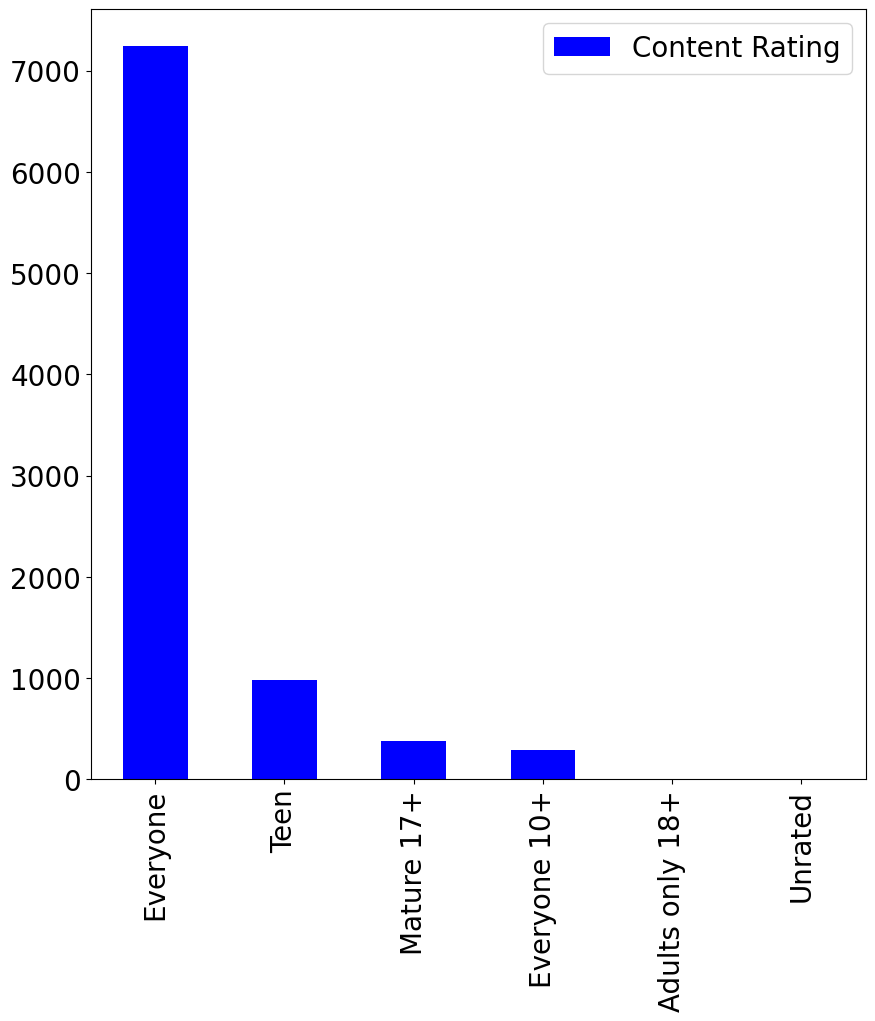

In [405]:
free_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='blue')
plt.legend()

Most Number of content ratings which got on Google Play Store can be used by everyone.The remaining apps have various age restrictions to use it.

###3) Does Last Update date has an effects on rating?

In [406]:
print(df1['Last Updated'].head())
#fetch update year from date
df1["Update year"] = df1["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')

8884   2017-10-07
8532   2018-08-02
324    2018-07-13
4541   2014-09-16
4636   2018-07-03
Name: Last Updated, dtype: datetime64[ns]


Text(0.5, 1.0, 'Update Year VS Rating')

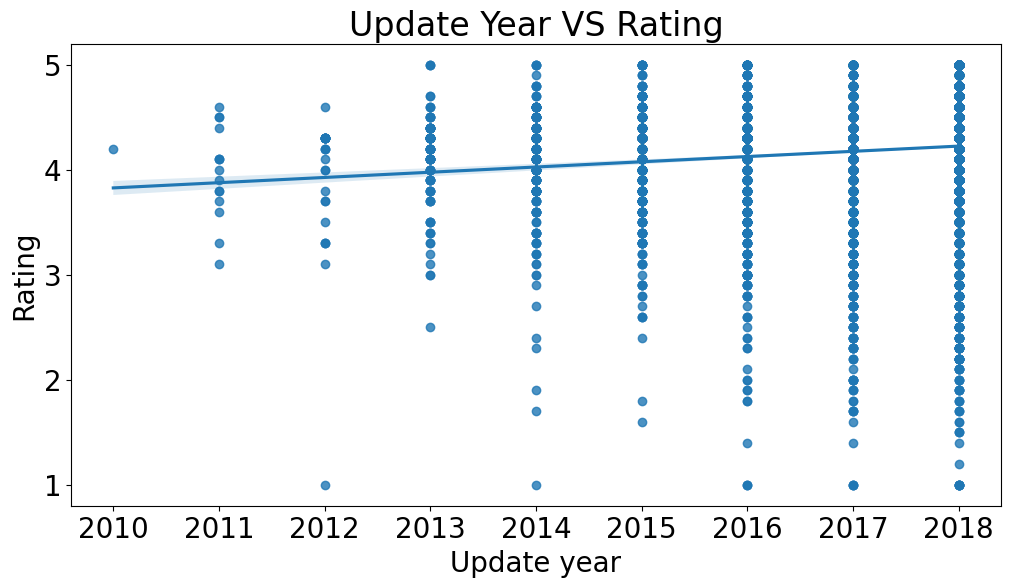

In [407]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=df1)
plt.title("Update Year VS Rating")

###4) Distribution of App update over the Year

In [408]:
paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')

<ipython-input-408-20d06b6ce484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')
<ipython-input-408-20d06b6ce484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')


<Axes: xlabel='Update year'>

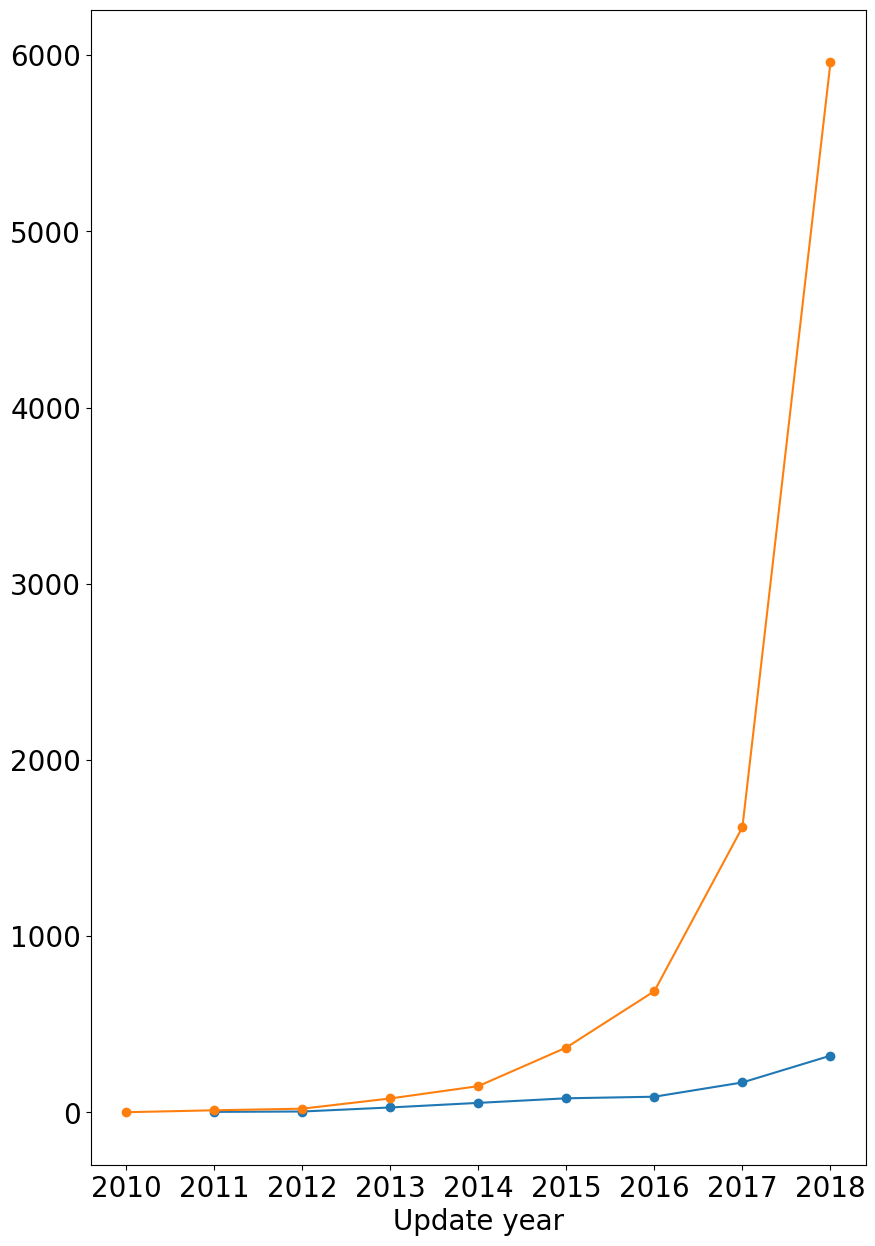

In [409]:
paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

In the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%. So we can conclude that most of the people are after free apps


###5) Distribution of Paid and Free app updated over the Month

In [410]:
paid_df["Update month"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')
free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')

<ipython-input-410-8b96eb159e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df["Update month"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')
<ipython-input-410-8b96eb159e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')


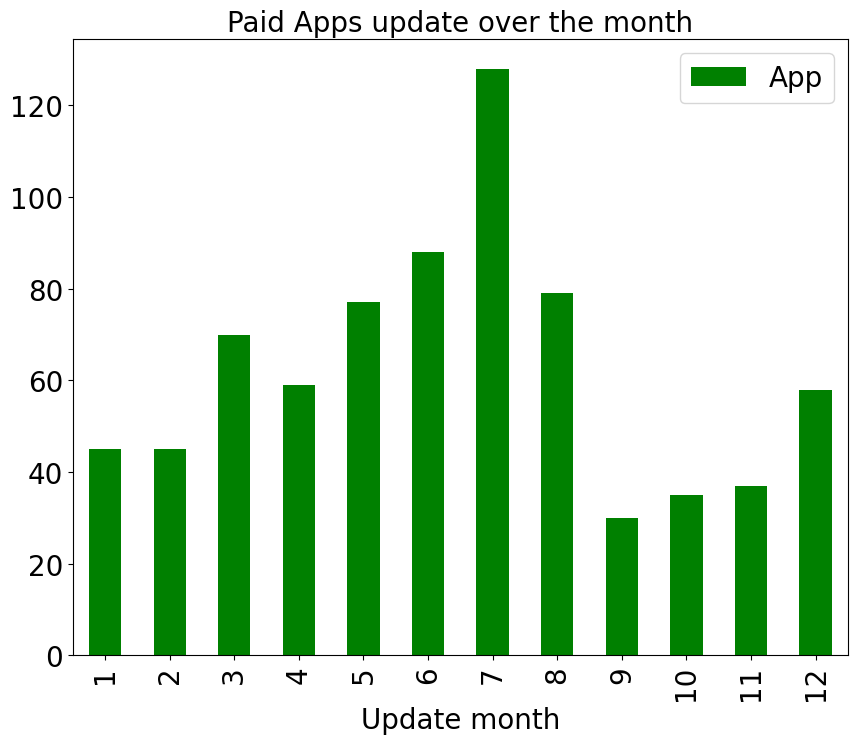

In [411]:
paid_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color= "green")
plt.title("Paid Apps update over the month", size=20)
plt.legend()

Most of the paid apps too updates in the month of July same as free apps

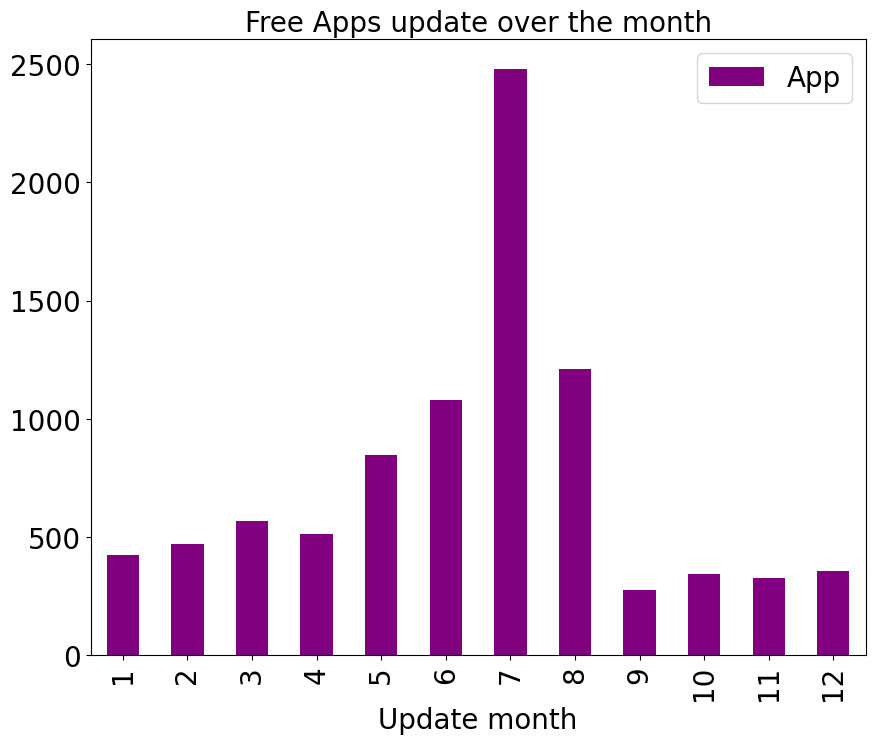

In [412]:
free_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color='purple')
plt.title("Free Apps update over the month", size=20)
plt.legend()

In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***